In [1]:
# https://www.eia.gov/opendata/documentation.php

import numpy as np
import pandas as pd
import calendar
from datetime import datetime, timedelta, date
import time
import datetime
from scipy.stats import linregress
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import matplotlib.lines as mlines
import matplotlib as mpl
import yfinance as yf
pd.options.display.max_rows=500
pd.set_option('display.max_columns', 500)
pd.set_option('display.max_colwidth', None)
from config import EIA_key
import eia
import requests
pd.options.mode.chained_assignment = None
import re

class Time:
    def __init__(self, series, time, route_one, route_two, types):
        self.series = series
        self.time = time
        self.route_one = route_one
        self.route_two = route_two
        self.types = types
    
    def total(self):
        Series_LNG_Export_Chile = f'https://api.eia.gov/v2/{self.types}/{self.route_one}/{self.route_two}/data?api_key={EIA_key}&frequency={self.time}&data[0]=value&facets[series][]={self.series}&sort[0][column]=period&sort[0][direction]=desc&offset=0&length=5000'
        re=requests.get(Series_LNG_Export_Chile)
        res=re.json()['response']['data']
        val=[]
        date=[]
        for d in res:
            values=d['value']
            dates=d['period']
            val.append(values)
            date.append(dates) 
        df_yc=pd.DataFrame(val,date)
        df_yc=df_yc.reset_index().rename(columns={'index': "Date", 0: "Value"})
        df_yc['Date']=pd.to_datetime(df_yc['Date']) 
        df_yc=df_yc.sort_values('Date')
        return df_yc

    def month(self):
        Series_LNG_Export_Chile = f'https://api.eia.gov/v2/natural-gas/move/expc/data/?api_key={EIA_key}&frequency=monthly&data[0]=value&facets[series][]={self.series}&sort[0][column]=period&sort[0][direction]=desc&offset=0&length=5000'
        re = requests.get(Series_LNG_Export_Chile)
        res = re.json()['response']['data']
        val = []
        date = []
        for d in res:
            values = d['value']
            dates = d['period']
            val.append(values)
            date.append(dates) 
        df_yc = pd.DataFrame(val, date)
        df_yc = df_yc.reset_index().rename(columns={'index': "Date", 0: "Value"})
        df_yc['Date'] = pd.to_datetime(df_yc['Date']) 
        df_yc = df_yc[df_yc['Date'] > self.total()['Date'].max()]
        df_yc = df_yc.sort_values('Date')
        return df_yc

def prints(df,col):
    print('First: '+str(round(df[col][0:1].to_list()[0],2))+'                    First Date: '+str(df['Date'][0:1].to_list()))
    print('Maximum: '+str(round(df[col].astype(float).max(),2))+'                Max Date: '+str(df[df[col].astype(float)==df[col].astype(float).max()]['Date'].to_list()[-1:]))
    print('Minimum: '+str(round(df[col].astype(float).min(),2))+'                Min Date: '+str(df[df[col].astype(float)==df[col].astype(float).min()]['Date'].to_list()[-1:]))
    print('Previous: '+str(round(df[col][-2:-1].to_list()[0],2))+'               Previous Date: '+str(df['Date'][-2:-1].to_list()))
    print('Last: '+str(round(df[col][-1:].to_list()[0],2))+'                     Last Date: '+str(df['Date'][-1:].to_list()))
    
    
    
print(datetime.datetime.now() )
start_date = "1990-01-01"
end_date =  datetime.datetime.now()
today=datetime.datetime.now()

year_now=int(str(today)[0:4])
month_now=int(str(today)[5:7])
day_now=int(str(today)[8:10])

# api_key = EIA_key
# api = eia.API(api_key)
# series='PET.EMM_EPM0_PTE_NUS_DPG.W'
print('02-21-2022--> War in Ukraine Starts')
print('https://www.eia.gov/opendata/#translate')

2023-04-23 20:48:47.782811
02-21-2022--> War in Ukraine Starts
https://www.eia.gov/opendata/#translate


In [2]:
# There is no API
print('https://www.eia.gov/petroleum/drilling/')
print('https://rigcount.bakerhughes.com/na-rig-count')
print('https://www.aogr.com/web-exclusives/us-frac-spread-count/2023')



################################################   DUC Data  EIA ##############################################################################

DUCInventory='Data/duc-data.csv'
DUCInventory_df=pd.read_csv(DUCInventory, header=3) 
DUCInventory_df.columns = ['Date','Anadarko_Drilled','Anadarko_Completed','Anadarko_DUC','Unnamed: 4','Appalachia_Drilled','Appalachia_Completed','Appalachia_DUC','Unnamed: 8','Bakken_Drilled','Bakken_Completed','Bakken_DUC','Unnamed: 12','Eagle Ford_Drilled','Eagle Ford_Completed', 'Eagle Ford_DUC', 'Unnamed: 16','Haynesville_Drilled','Haynesville_Completed','Haynesville_DUC', 'Unnamed: 20', 'Niobrara_Drilled','Niobrara_Completed', 'Niobrara_DUC','Unnamed: 24','Permian_Drilled','Permian_Completed', 'Permian_DUC','Unnamed: 28', 'Total_Drilled','Total_Completed','Total_DUC']                                         
DUCInventory_df=DUCInventory_df.iloc[1:-4, ]
DUCInventory_df=DUCInventory_df[['Date','Anadarko_DUC','Appalachia_DUC','Bakken_DUC','Eagle Ford_DUC','Haynesville_DUC','Niobrara_DUC','Permian_DUC', 'Total_DUC']]
DUCInventory_df['Date'] = pd.to_datetime(DUCInventory_df["Date"], format='%b-%y')
DUCInventory_df.set_index('Date', inplace=True) 

shalePlays=['Anadarko_DUC','Appalachia_DUC','Bakken_DUC','Eagle Ford_DUC','Haynesville_DUC','Niobrara_DUC','Permian_DUC', 'Total_DUC'] 
for i in shalePlays:
    DUCInventory_df[i]=pd.to_numeric(DUCInventory_df[i].astype(str).str.replace(',',''), errors='coerce')
DUCInventory_date_df = DUCInventory_df[(DUCInventory_df.index> start_date) & (DUCInventory_df.index< end_date)]
DUCInventory_now_df=DUCInventory_df[-3:]
DUCInventory_df.reset_index(inplace=True)
DUCInventory_date_df.reset_index(inplace=True)

#########################################################    Baker Hughes Rig Count By Field  #####################################################################


col_names = ['Date', 'Ardmore_Oil', 'Ardmore_Gas', 'Ardmore_Misc', 'Ardmore_Total', 'Arkoma_Oil', 'Arkoma_Gas', 'Arkoma_Misc', 'Arkoma_Total', 'Barnett_Oil', 'Barnett_Gas', 'Barnett_Misc', 'Barnett_Total', 'Cana_Oil', 'Cana_Gas', 'Cana_Misc', 'Cana_Total', 'Niobrara_Oil', 'Niobrara_Gas', 'Niobrara_Misc', 'Niobrara_Total', 'Eagle_Ford_Oil', 'Eagle_Ford_Gas', 'Eagle_Ford_Misc', 'Eagle_Ford_Total', 'Fayetteville_Oil', 'Fayetteville_Gas', 'Fayetteville_Misc', 'Fayetteville_Total', 'Granite_Wash_Oil', 'Granite_Wash_Gas', 'Granite_Wash_Misc', 'Granite_Wash_Total', 'Haynesville_Oil', 'Haynesville_Gas', 'Haynesville_Misc', 'Haynesville_Total', 'Marcellus_Oil', 'Marcellus_Gas', 'Marcellus_Misc', 'Marcellus_Total', 'Mississippian_Oil', 'Mississippian_Gas', 'Mississippian_Misc', 'Mississippian_Total', 'Permian_Oil', 'Permian_Gas', 'Permian_Misc', 'Permian_Total', 'Utica_Oil', 'Utica_Gas', 'Utica_Misc', 'Utica_Total', 'Williston_Oil', 'Williston_Gas', 'Williston_Misc', 'Williston_Total', 'Others_Oil', 'Others_Gas', 'Others_Misc', 'Others_Total', 'Total_Oil', 'Total_Gas', 'Total_Misc', 'Total_Total']
column_lst=['Date','Oil', 'Gas', 'Misc', 'Total', 'Oil.1','Gas.1', 'Misc.1','Total.1', 'Oil.2', 'Gas.2', 'Misc.2', 'Total.2', 'Oil.3', 'Gas.3', 'Misc.3', 'Total.3', 'Oil.4', 'Gas.4', 'Misc.4', 'Total.4', 'Oil.5', 'Gas.5', 'Misc.5', 'Total.5', 'Oil.6', 'Gas.6', 'Misc.6', 'Total.6', 'Oil.7', 'Gas.7', 'Misc.7', 'Total.7', 'Oil.8', 'Gas.8', 'Misc.8', 'Total.8', 'Oil.9', 'Gas.9', 'Misc.9', 'Total.9', 'Oil.10', 'Gas.10', 'Misc.10', 'Total.10', 'Oil.11', 'Gas.11', 'Misc.11', 'Total.11', 'Oil.12', 'Gas.12', 'Misc.12', 'Total.12', 'Oil.13', 'Gas.13', 'Misc.13', 'Total.13', 'Oil.14', 'Gas.14', 'Misc.14', 'Total.14', 'Oil.15', 'Gas.15','Misc.15','Total.15']
cols_to_rename = dict(zip(column_lst, col_names))
rig_field = pd.read_csv('Data/Baker_rig_count_field.csv', header=10, skipfooter=2, engine='python')
rig_field = rig_field.rename(columns=cols_to_rename)
rig_field['Date']=pd.to_datetime(rig_field["Date"], format='%m/%d/%Y')

##############################################  Baker Hughes Rig Count Oil/Gas ################################################################################

rig = pd.read_csv(r'Data/Baker_rig_count.csv', header=6, skipfooter=2, engine='python')
rig=rig[['Date', 'Oil', 'Gas', 'Misc', 'Total']]
# rig.columns = ['Date', 'Oil', 'Gas', 'Misc', 'Total']
rig['Date'] = pd.to_datetime(rig['Date'], format='%m/%d/%Y')
rig[['Oil', 'Gas', 'Misc', 'Total']] = rig[['Oil', 'Gas', 'Misc', 'Total']].applymap(lambda x: str(x).replace(',', '')).astype(int)

https://www.eia.gov/petroleum/drilling/
https://rigcount.bakerhughes.com/na-rig-count
https://www.aogr.com/web-exclusives/us-frac-spread-count/2023


# Frac Spread --> Needs Updated CSV

First: 283                    First Date: [Timestamp('2023-04-14 00:00:00')]
Maximum: 463.0                Max Date: [Timestamp('2019-01-25 00:00:00')]
Minimum: 41.0                Min Date: [Timestamp('2021-02-19 00:00:00')]
Previous: 425               Previous Date: [Timestamp('2019-01-11 00:00:00')]
Last: 381                     Last Date: [Timestamp('2019-01-04 00:00:00')]


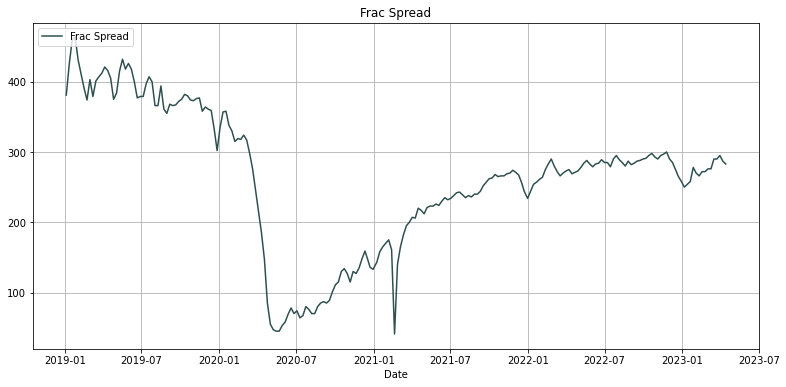

In [3]:
frac=pd.read_csv('Data/frac.csv')
frac['Date']=pd.to_datetime(frac['Date'])

year=2019
fig, ax=plt.subplots(frameon=False, figsize=(13,6))

ax.set_xlabel('Date')
# ax.set_ylabel('Frac Spread')
ax.plot(frac['Date'],frac['Spread'], color='darkslategrey')
ax.xaxis.set_major_formatter(mdates.DateFormatter("%Y-%m"))
ax.set_title("Frac Spread")
ax.grid()
prints(frac,'Spread')

blue_line = mlines.Line2D([], [], color='darkslategrey', label='Frac Spread')
plt.legend(handles=[blue_line], loc='upper left')
plt.savefig("Data/Images/frac_spread.png", bbox_inches='tight')
plt.show()

# Rig Data-->Needs Updated CSV

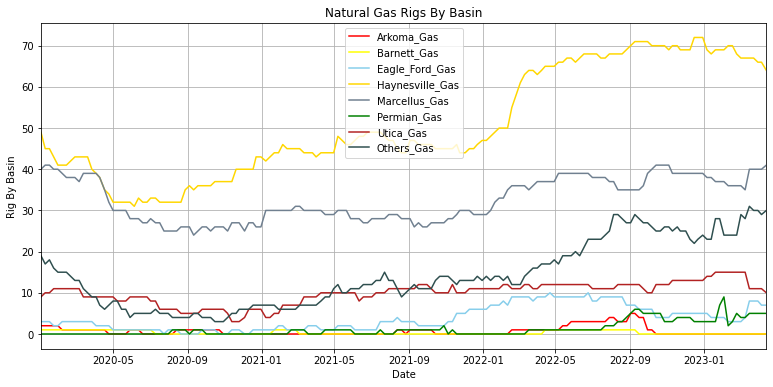

In [4]:
rig_field_date=rig_field[rig_field['Date'].astype(str)>'2020-01-01']
from matplotlib.ticker import FixedLocator, LinearLocator, FormatStrFormatter

fig, ax=plt.subplots(frameon=False, figsize=(13,6))
x=[0,200]

plt.ylabel('Rig By Basin')
plt.xlabel('Date')
plt.title('Natural Gas Rigs By Basin')
plt.margins(x=.00)
Labels=[]

Plays=[ 'Arkoma_Gas', 'Barnett_Gas', 'Eagle_Ford_Gas','Haynesville_Gas','Marcellus_Gas','Permian_Gas','Utica_Gas','Others_Gas']
Colors=[  'red',     'yellow',        'skyblue',      'gold',         'slategrey',     'green',    'firebrick','darkslategray']
for i,j in zip(Plays,Colors):
    ax.plot(rig_field_date['Date'],rig_field_date[i], color=j)
    line=mlines.Line2D([], [], color=j, label='[i]')
    plt.legend(['Arkoma_Gas', 'Barnett_Gas','Eagle_Ford_Gas','Haynesville_Gas','Marcellus_Gas','Permian_Gas','Utica_Gas','Others_Gas'], loc='upper center')      
plt.grid()

plt.savefig("Data/Images/Rigs_By_Basin_oil.png", bbox_inches='tight')

In [5]:
rig_field_date=rig_field[rig_field['Date'].astype(str)>'2022-01-01']
from matplotlib.ticker import FixedLocator, LinearLocator, FormatStrFormatter

fig, ax=plt.subplots(frameon=False, figsize=(13,6))
x=[0,200]

plt.ylabel('Rig By Basin')
plt.xlabel('Date')
plt.title('Oil Rigs By Basin')
plt.margins(x=.00)
Labels=[]

Plays=['Cana_Oil', 'Niobrara_Oil', 'Eagle_Ford_Oil','Granite_Wash_Oil','Permian_Oil','Williston_Oil']
Colors=['dodgerblue', 'yellow',       'skyblue',     'firebrick',       'green',     'darkslategray']
for i,j in zip(Plays,Colors):
    ax.plot(rig_field_date['Date'],rig_field_date[i], color=j)
    line=mlines.Line2D([], [], color=j, label='[i]')


plt.legend(['Cana_Oil', 'Niobrara_Oil', 'Eagle_Ford_Oil', 'Granite_Wash_Oil','Permian_Oil','Williston_Oil'], loc='upper center')      
plt.grid()
# ax.set_ylim(0,200)
plt.savefig("Data/Images/Rigs_By_Basin_oil.png", bbox_inches='tight')

# DUC Graphs Visualizations --> Needs Updated CSV

#### Total DUC Inventory

In [6]:
year = 2014
fig, ax = plt.subplots(frameon=False, figsize=(13, 6))

# Set the title and y-axis label
ax.set_title("Total DUC Inventory")
ax.set_ylabel('DUC Inventory')

# Plot the data
data = DUCInventory_df.loc[DUCInventory_df['Date'].dt.year >= year]
ax.plot(data['Date'], data['Total_DUC'], color='darkslategrey')

# Set the x-axis label and formatter, and other formatting
ax.set_xlabel('Date')
ax.xaxis.set_major_formatter(mdates.DateFormatter("%Y"))
ax.grid()
ax.set_ylim(4000, 9000)
ax.set_xlim([datetime.date(year, 1, 15), None])
ax.legend(['Total DUC Inventory'], loc='upper left')

# Save the figure and show it
plt.savefig("Data/Images/DUC_total.png", bbox_inches='tight')
plt.show()

prints(data, 'Total_DUC')

First: 4542                    First Date: [Timestamp('2014-01-01 00:00:00')]
Maximum: 8778.0                Max Date: [Timestamp('2020-06-01 00:00:00')]
Minimum: 4542.0                Min Date: [Timestamp('2014-01-01 00:00:00')]
Previous: 4752               Previous Date: [Timestamp('2023-01-01 00:00:00')]
Last: 4773                     Last Date: [Timestamp('2023-02-01 00:00:00')]


#### DUC Inventory By Shale Play Bar Chart

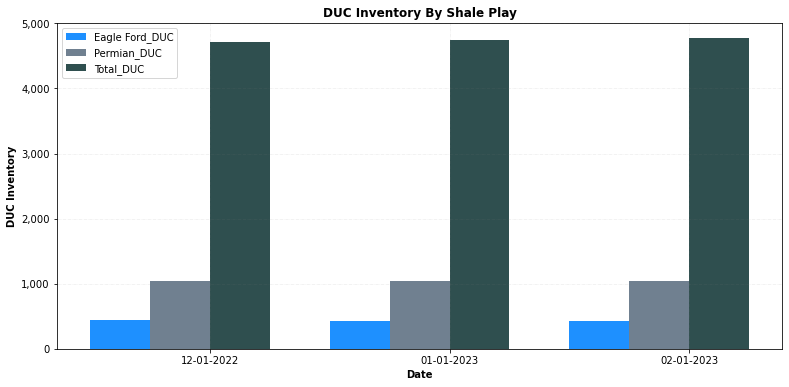

In [7]:
import pandas as pd
f = pd.to_datetime(DUCInventory_now_df.index)
figure, ax = plt.subplots(figsize=(13, 6))

number_groups = len(['Eagle Ford_DUC', 'Permian_DUC', 'Total_DUC'])
numerical = [DUCInventory_now_df['Eagle Ford_DUC'], DUCInventory_now_df['Permian_DUC'], DUCInventory_now_df['Total_DUC']]
bin_width = 1.0 / (number_groups + 1)
colors = ['dodgerblue', 'slategrey', 'darkslategrey']

for i, (play, values) in enumerate(zip(['Eagle Ford_DUC', 'Permian_DUC', 'Total_DUC'], numerical)):
    ax.bar(x=np.arange(len(['Eagle Ford_DUC', 'Permian_DUC', 'Total_DUC'])) + i * bin_width,
           height=values,
           width=bin_width,
           color=colors[i],
           label=play)

ax.set_xticks(np.arange(len(['Eagle Ford_DUC', 'Permian_DUC', 'Total_DUC'])) + number_groups / (2 * (number_groups + 1)))
ax.set_xticklabels(f[-3:].strftime('%m-%d-%Y'))
ax.yaxis.set_major_formatter(mpl.ticker.StrMethodFormatter('{x:,.0f}'))
ax.legend(loc='upper left', facecolor='w')
ax.set_xlabel('Date', fontweight='bold')
ax.set_ylabel('DUC Inventory', fontweight='bold')
ax.set_title('DUC Inventory By Shale Play', fontweight='bold')
ax.grid(b=True, color='grey', linestyle='-.', linewidth=0.5, alpha=0.2)
plt.show()

# plt.savefig('Data/Images/DUC_Inventory_Bar.png', bbox_inches='tight')

#### DUC Inventory By Major Shale Play Bar Chart

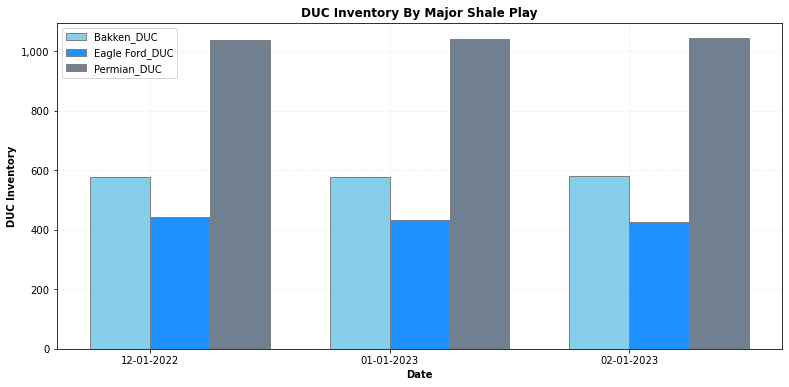

In [8]:
f = DUCInventory_now_df.index.to_pydatetime()
figure, ax = plt.subplots(figsize=(13, 6))
bar_width = 0.25

plays = ['Bakken_DUC', 'Eagle Ford_DUC', 'Permian_DUC']
colors = ['skyblue', 'dodgerblue', 'slategrey']
n_bars = len(plays)

ax.set_ylabel('DUC Inventory', fontweight='bold')
ax.set_title('DUC Inventory By Major Shale Play', fontweight='bold')

# Compute the bar positions using NumPy
bar_positions = np.arange(len(f[-3:])) + 0.5 * (n_bars - 1) * bar_width - 0.5 * bar_width

for i, (play, color) in enumerate(zip(plays, colors)):
    bars = DUCInventory_now_df[play][-3:]
    ax.bar(bar_positions + i * bar_width, bars, color=color, width=bar_width, edgecolor='grey')

ax.set_xticks(np.arange(len(f[-3:])) + 0.5 * (n_bars - 1) * bar_width)
ax.set_xticklabels([d.strftime('%m-%d-%Y') for d in f[-3:].tolist()])
ax.yaxis.set_major_formatter(mpl.ticker.StrMethodFormatter('{x:,.0f}'))
ax.grid(b=True, color='grey', linestyle='-.', linewidth=0.5, alpha=0.2)
ax.legend(plays, facecolor='w')
ax.set_xlabel('Date', fontweight='bold')

plt.show()


#### DUC Inventory By Basin Pie Chart

C:\Users\15124\anaconda3\envs\PythonData\lib\site-packages\ipykernel_launcher.py:8: MatplotlibDeprecationWarning: Non-1D inputs to pie() are currently squeeze()d, but this behavior is deprecated since 3.1 and will be removed in 3.3; pass a 1D array instead.
  


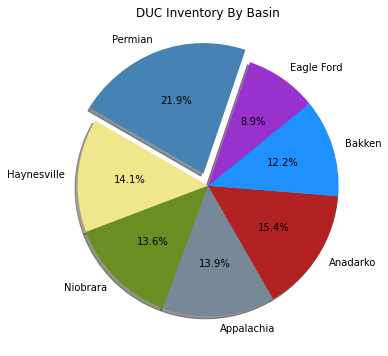

In [9]:
pie_df=DUCInventory_now_df[2:][['Haynesville_DUC','Niobrara_DUC', 'Appalachia_DUC','Anadarko_DUC','Bakken_DUC','Eagle Ford_DUC','Permian_DUC']]
plt.subplots(figsize=(13, 6))
plt.pie(pie_df,
    labels=[ "Haynesville", "Niobrara", "Appalachia", "Anadarko", "Bakken", "Eagle Ford","Permian"],
    colors=["khaki", "olivedrab",  "lightslategrey", "firebrick",  'dodgerblue','darkorchid','steelblue'],
    explode=[0, 0, 0,0,0,0,0.1],
    autopct='%1.1f%%',
    shadow=True, startangle=150)
plt.title("DUC Inventory By Basin")
ax.yaxis.set_major_formatter(mpl.ticker.StrMethodFormatter('{x:,.0f}'))
mpl.rcParams['font.size'] = 14
# plt.savefig("Data/Images/Pie_Chart_DUCs.png", bbox_inches='tight')
plt.show()

### Total DUC Inventory

First: 4542                    First Date: [Timestamp('2014-01-01 00:00:00')]
Maximum: 8778.0                Max Date: [Timestamp('2020-06-01 00:00:00')]
Minimum: 4542.0                Min Date: [Timestamp('2014-01-01 00:00:00')]
Previous: 4752               Previous Date: [Timestamp('2023-01-01 00:00:00')]
Last: 4773                     Last Date: [Timestamp('2023-02-01 00:00:00')]


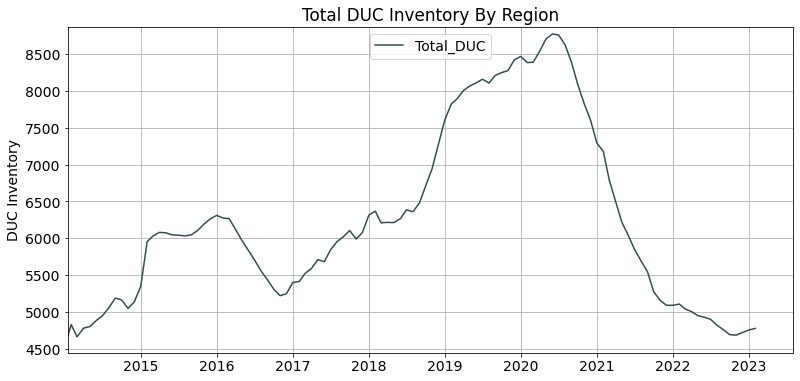

In [10]:
year=2014
from matplotlib.ticker import FixedLocator, LinearLocator, FormatStrFormatter
fig, ax=plt.subplots(frameon=False, figsize=(13,6))
plt.ylabel('DUC Inventory')
plt.title('Total DUC Inventory By Region')
plt.margins(x=.00)
Labels=[]
Plays=[ 'Total_DUC']
Colors=['darkslategrey']
for i,j in zip(Plays,Colors):
    ax.plot(DUCInventory_date_df['Date'],DUCInventory_date_df[i], color=j)
    line=mlines.Line2D([], [], color=j, label='[i]')
    plt.legend(['Total_DUC'], loc='upper center')      
ax.set_ylim(DUCInventory_date_df['Total_DUC'].min()-100,DUCInventory_date_df['Total_DUC'].max()+100)
ax.set_xlim([datetime.date(year, 1, 15), datetime.datetime.now()+timedelta(100)])
plt.grid()
prints(DUCInventory_date_df,'Total_DUC')
# plt.savefig("Data/Images/DUC_total.png", bbox_inches='tight')
plt.show()

In [11]:
prints(DUCInventory_date_df,'Permian_DUC')

First: 655                    First Date: [Timestamp('2014-01-01 00:00:00')]
Maximum: 3583.0                Max Date: [Timestamp('2020-07-01 00:00:00')]
Minimum: 655.0                Min Date: [Timestamp('2014-01-01 00:00:00')]
Previous: 1042               Previous Date: [Timestamp('2023-01-01 00:00:00')]
Last: 1044                     Last Date: [Timestamp('2023-02-01 00:00:00')]


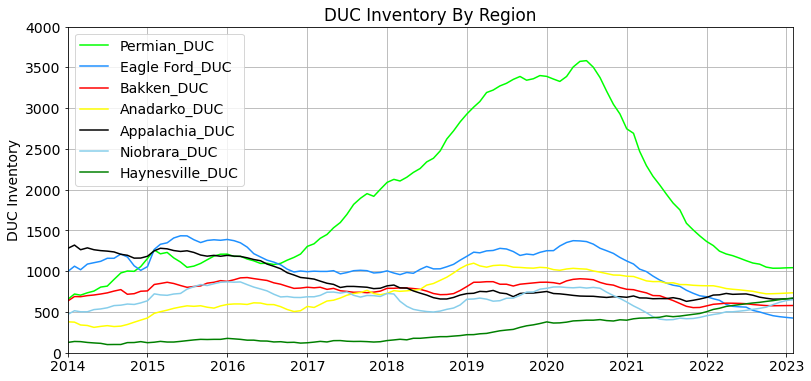

In [12]:
from matplotlib.ticker import FixedLocator, LinearLocator, FormatStrFormatter
fig, ax=plt.subplots(frameon=False, figsize=(13,6))
plt.ylabel('DUC Inventory')
plt.title('DUC Inventory By Region')
plt.margins(x=.00)
Labels=[]
Plays=[ 'Permian_DUC',  'Eagle Ford_DUC', 'Bakken_DUC', 'Anadarko_DUC', 'Appalachia_DUC', 'Niobrara_DUC', 'Haynesville_DUC']
Colors=['lime',       'dodgerblue',     'red',     'yellow',         'black',          'skyblue',  'green']
for i,j in zip(Plays,Colors):
    ax.plot(DUCInventory_date_df['Date'],DUCInventory_date_df[i], color=j)
    line=mlines.Line2D([], [], color=j, label='[i]')
    plt.legend(['Permian_DUC',  'Eagle Ford_DUC', 'Bakken_DUC', 'Anadarko_DUC', 'Appalachia_DUC', 'Niobrara_DUC', 'Haynesville_DUC'], loc='upper left')      
ax.set_ylim(0,4000)
plt.grid()
plt.savefig("Data/Images/DUC_all_fields.png", bbox_inches='tight')
plt.show()

#### DUC Inventory By Region Line Chart

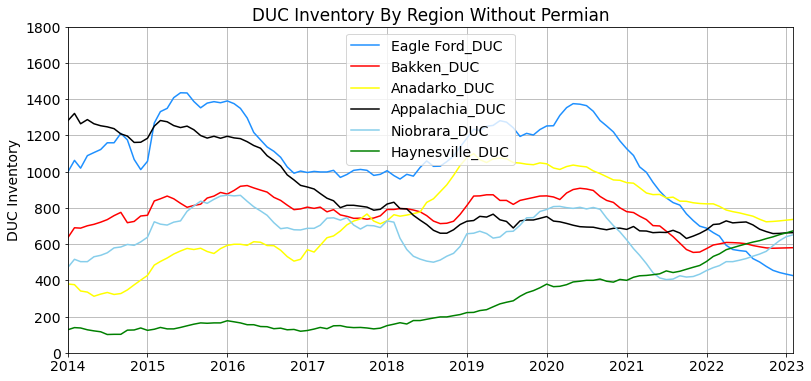

In [13]:
DUCInventory_date_df=DUCInventory_df[DUCInventory_df['Date'].astype(str)>'1990-01-01']
from matplotlib.ticker import FixedLocator, LinearLocator, FormatStrFormatter
fig, ax=plt.subplots(frameon=False, figsize=(13,6))
plt.ylabel('DUC Inventory')
plt.title('DUC Inventory By Region Without Permian')
plt.margins(x=.00)
Labels=[]
Plays=['Eagle Ford_DUC', 'Bakken_DUC', 'Anadarko_DUC', 'Appalachia_DUC', 'Niobrara_DUC', 'Haynesville_DUC']
Colors=['dodgerblue',     'red',     'yellow',         'black',          'skyblue',  'green']
for i,j in zip(Plays,Colors):
    ax.plot(DUCInventory_date_df['Date'],DUCInventory_date_df[i], color=j)
    line=mlines.Line2D([], [], color=j, label='[i]')
    plt.legend(['Eagle Ford_DUC', 'Bakken_DUC', 'Anadarko_DUC', 'Appalachia_DUC', 'Niobrara_DUC', 'Haynesville_DUC'], loc='upper center')      
plt.grid()
ax.set_ylim(0,1800)
plt.savefig("Data/Images/DUC_not_permian.png", bbox_inches='tight')
plt.show()

# LNG API

In [14]:
import time
start_time = time.time()

def create_dataframes(**kwargs):
    dataframes = {}
    for name, values in kwargs.items():
        time_obj = Time(*values)
        df = time_obj.total()
        df['Value'] = df['Value'] / 30.5 / 1000
        df=df.set_index('Date')
        dataframes[name] = df
    return dataframes

LNG = create_dataframes(
    # LNG export Asia
    Total_LNG_Export_Vessel=('N9133US2', 'monthly', 'move', 'expc', 'natural-gas'),
    LNG_Export_Bangladesh=('NGM_EPG0_EVE_NUS-NBG_MMCF', 'monthly', 'move', 'expc', 'natural-gas'),
    LNG_Export_Indonesia=('NGM_EPG0_EVE_NUS-NID_MMCF', 'monthly', 'move', 'expc', 'natural-gas'),
    LNG_Export_India=('NGM_EPG0_EVE_NUS-NIN_MMCF', 'monthly', 'move', 'expc', 'natural-gas'),
    LNG_Export_Thailand=('NGM_EPG0_EVE_NUS-NTH_MMCF', 'monthly', 'move', 'expc', 'natural-gas'),
    LNG_Export_Taiwan=('NGM_EPG0_EVE_NUS-NTW_MMCF', 'monthly', 'move', 'expc', 'natural-gas'),
    LNG_Export_Singapore=('NGM_EPG0_EVE_NUS-NSN_MMCF', 'monthly', 'move', 'expc', 'natural-gas'),
    LNG_Export_South_Korea=('NGM_EPG0_EVE_NUS-NKS_MMCF', 'monthly', 'move', 'expc', 'natural-gas'),
    LNG_Export_China=('NGM_EPG0_EVE_NUS-NCH_MMCF', 'monthly', 'move', 'expc', 'natural-gas'),
    LNG_Export_Pakistan=('NGM_EPG0_EVE_NUS-NPK_MMCF', 'monthly', 'move', 'expc', 'natural-gas'),
    
    
    # Latin America
    LNG_Export_Brazil=('NGM_EPG0_EVE_NUS-NBR_MMCF', 'monthly', 'move', 'expc', 'natural-gas'),
    LNG_Export_Haiti=('NGM_EPG0_EVE_NUS-NHA_MMCF', 'monthly', 'move', 'expc', 'natural-gas'),
    LNG_Export_DR=('NGM_EPG0_EVE_NUS-NDR_MMCF', 'monthly', 'move', 'expc', 'natural-gas'),
    LNG_Export_Cololmbia=('NGM_EPG0_EVE_NUS-NCO_MMCF', 'monthly', 'move', 'expc', 'natural-gas'),
    LNG_Export_Chile=('NGM_EPG0_EVE_NUS-NCI_MMCF', 'monthly', 'move', 'expc', 'natural-gas'),
    LNG_Export_Barbados=('NGM_EPG0_EVE_NUS-NBB_MMCF', 'monthly', 'move', 'expc', 'natural-gas'),
    LNG_Export_Bahamas=('NGM_EPG0_EVE_NUS-NBF_MMCF', 'monthly', 'move', 'expc', 'natural-gas'),
    LNG_Export_Argentina=('NGM_EPG0_EVE_NUS-NAT_MMCF', 'monthly', 'move', 'expc', 'natural-gas'),
    LNG_Export_Antigua=('NGM_EPG0_EVE_NUS-NAC_MMCF', 'monthly', 'move', 'expc', 'natural-gas'),
    LNG_Export_Jamaica=('NGM_EPG0_EVE_NUS-NJM_MMCF', 'monthly', 'move', 'expc', 'natural-gas'),
    LNG_Export_Panama=('NGM_EPG0_EVE_NUS-NPM_MMCF', 'monthly', 'move', 'expc', 'natural-gas'),
    LNG_Export_Mexico=('NGM_EPG0_EVE_NUS-NMX_MMCF', 'monthly', 'move', 'expc', 'natural-gas'),
    
    
    # LNG Middle East
    LNG_Export_Kuwait=('NGM_EPG0_EVE_NUS-NKU_MMCF', 'monthly', 'move', 'expc', 'natural-gas'),
    LNG_Export_Turkey=('NGM_EPG0_EVE_NUS-NTU_MMCF', 'monthly', 'move', 'expc', 'natural-gas'),
    LNG_Export_Israel=('NGM_EPG0_EVE_NUS-NIS_MMCF', 'monthly', 'move', 'expc', 'natural-gas'),
    
    
    # LNG EUrope
    LNG_Export_Malta=('NGM_EPG0_EVE_NUS-NM6_MMCF', 'monthly', 'move', 'expc', 'natural-gas'),
    LNG_Export_Lithuania=('NGM_EPG0_EVE_NUS-NLH_MMCF', 'monthly', 'move', 'expc', 'natural-gas'),
    LNG_Export_Portual=('NGM_EPG0_EVE_NUS-NPO_MMCF', 'monthly', 'move', 'expc', 'natural-gas'),
    LNG_Export_Poland=('NGM_EPG0_EVE_NUS-NPL_MMCF', 'monthly', 'move', 'expc', 'natural-gas'),
    LNG_Export_UK=('NGM_EPG0_EVE_NUS-NUK_MMCF', 'monthly', 'move', 'expc', 'natural-gas'),
    LNG_Export_Spain=('NGM_EPG0_EVE_NUS-NSP_MMCF', 'monthly', 'move', 'expc', 'natural-gas'),
    LNG_Export_France=('NGM_EPG0_EVE_NUS-NFR_MMCF', 'monthly', 'move', 'expc', 'natural-gas'),
    LNG_Export_Nederlands=('NGM_EPG0_EVE_NUS-NNL_MMCF', 'monthly', 'move', 'expc', 'natural-gas'),
    LNG_Export_Greece=('NGM_EPG0_EVE_NUS-NGR_MMCF', 'monthly', 'move', 'expc', 'natural-gas'),
    LNG_Export_Croatia=('NGM_EPG0_EVE_NUS-NHR_MMCF', 'monthly', 'move', 'expc', 'natural-gas'),
    LNG_Export_Belgium=('NGM_EPG0_EVE_NUS-NBE_MMCF', 'monthly', 'move', 'expc', 'natural-gas'),
    LNG_Export_Italy=('NGM_EPG0_EVE_NUS-NIT_MMCF', 'monthly', 'move', 'expc', 'natural-gas')

)









keys = ['LNG_Export_Pakistan', 'LNG_Export_China', 'LNG_Export_South_Korea', 'LNG_Export_Singapore', 'LNG_Export_Taiwan', 'LNG_Export_Thailand', 'LNG_Export_India', 'LNG_Export_Indonesia', 'LNG_Export_Bangladesh']
Asia_LNG_Export = sum([LNG[key].fillna(0) for key in keys])
Asia_LNG_Export = Asia_LNG_Export.reset_index()

countries = ['Brazil', 'Haiti', 'DR', 'Cololmbia', 'Chile', 'Barbados', 'Bahamas', 'Argentina', 'Antigua', 'Jamaica', 'Panama', 'Mexico']
LatinAmerica_LNG_Export = pd.DataFrame(LNG[f'LNG_Export_{countries[0]}'])
for country in countries[1:]:
    LatinAmerica_LNG_Export = LatinAmerica_LNG_Export.add(LNG[f'LNG_Export_{country}'], fill_value=0)
LatinAmerica_LNG_Export = LatinAmerica_LNG_Export.reset_index()


countries = ['Kuwait', 'Turkey', 'Israel']
MidEast_LNG_Exports = pd.DataFrame(LNG[f'LNG_Export_{countries[0]}'])
for country in countries[1:]:
    MidEast_LNG_Exports = MidEast_LNG_Exports.add(LNG[f'LNG_Export_{country}'], fill_value=0)
MidEast_LNG_Exports = MidEast_LNG_Exports.reset_index()


europe_countries = ['Nederlands', 'Italy', 'Belgium', 'Greece', 'Croatia', 'France', 'Spain', 'Malta', 'Lithuania', 'Portual', 'Poland', 'UK']
Europe_LNG_Exports = pd.DataFrame(LNG[f'LNG_Export_{countries[0]}'])
for country in countries[1:]:
    Europe_LNG_Exports = Europe_LNG_Exports.add(LNG[f'LNG_Export_{country}'], fill_value=0)
Europe_LNG_Exports = Europe_LNG_Exports.reset_index()


end_time = time.time()
print(f"Time elapsed: {end_time - start_time:.2f} seconds")  

Time elapsed: 46.57 seconds


# General API

In [15]:
import time
start_time = time.time()

def create_dataframes(**kwargs):
    dataframes = {}
    for name, values in kwargs.items():
        time_obj = Time(*values)
        df = time_obj.total()
        df['Value'] = df['Value']# / 30.5 / 1000
        
        df=df.reset_index()
        dataframes[name] = df
    return dataframes


general_df = create_dataframes(
    
    onshore_df=('E_ERTRR0_XR0_RUSON_C', 'monthly','enr','drill','natural-gas'),
    offshore_df=('E_ERTRR0_XR0_RUSOF_C', 'monthly','enr','drill','natural-gas'),
    crude_rig=('E_ERTRRO_XR0_NUS_C', 'monthly','enr','drill','natural-gas'),
    natural_gas_df=('E_ERTRRG_XR0_NUS_C', 'monthly','enr','drill','natural-gas'),
    diesel_df=('WDISTUS1','weekly','stoc','wstk','petroleum'),
    gasoline_df=('WGTSTUS1', 'weekly','sum','sndw','petroleum'),
    crude_df=('WCESTUS1','weekly','sum','sndw','petroleum'),
    WTI_df=('RWTC','daily','pri','spt','petroleum'),
    brent_df=('RBRTE', 'daily','pri','spt','petroleum'),
    kerosene_df=('EER_EPJK_PF4_RGC_DPG','daily','pri','spt','petroleum'),
    gasoline_prices_df=('EMM_EPM0_PTE_NUS_DPG','weekly','pri','gnd','petroleum'),
    diesel_prices_df=('EMD_EPD2D_PTE_NUS_DPG','weekly','pri','gnd','petroleum'),
    spr_df=('WCSSTUS1', 'weekly','sum','sndw','petroleum'),
    crude_inputs_df=('WCRRIUS2','weekly','sum','sndw','petroleum'),
    capacity_df=('WOCLEUS2', 'weekly','sum','sndw','petroleum'),
    percent_capacity_df=('WPULEUS3', 'weekly','sum','sndw','petroleum')
)

gasoline_date_df=general_df['gasoline_df'].loc[(general_df['gasoline_df']['Date']>start_date) & (general_df['gasoline_df']['Date']< end_date)]
crude_date_df=general_df['crude_df'].loc[(general_df['crude_df']['Date']>start_date) & (general_df['crude_df']['Date']< end_date)]
WTI_date_df=general_df['WTI_df'].loc[(general_df['WTI_df']['Date']>start_date) & (general_df['WTI_df']['Date']< end_date)]

end_time = time.time()
print(f"Time elapsed: {end_time - start_time:.2f} seconds")  

Time elapsed: 31.57 seconds


# Crude Prices

###################### Brent ########################
First: 97.01                    First Date: [Timestamp('2008-01-02 00:00:00')]
Maximum: 143.95                Max Date: [Timestamp('2008-07-03 00:00:00')]
Minimum: 9.12                Min Date: [Timestamp('2020-04-21 00:00:00')]
Previous: 85.63               Previous Date: [Timestamp('2023-04-17 00:00:00')]
Last: 85.48                     Last Date: [Timestamp('2023-04-18 00:00:00')]
###################### WTI ########################
First: 99.64                    First Date: [Timestamp('2008-01-02 00:00:00')]
Maximum: 145.31                Max Date: [Timestamp('2008-07-03 00:00:00')]
Minimum: -36.98                Min Date: [Timestamp('2020-04-20 00:00:00')]
Previous: 80.93               Previous Date: [Timestamp('2023-04-17 00:00:00')]
Last: 80.85                     Last Date: [Timestamp('2023-04-18 00:00:00')]


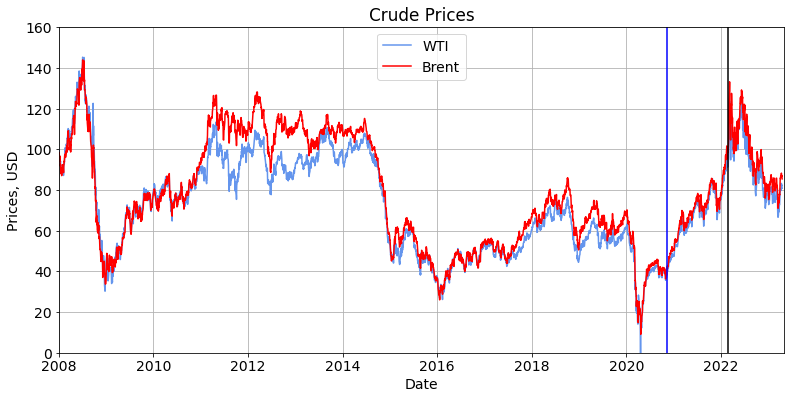

In [16]:
year=2008
start_date_crude = f"{year}-01-01"
end_date_crude =  datetime.datetime.now()+timedelta(1)
WTI_date_storage_df = general_df['WTI_df'].loc[(general_df['WTI_df']['Date']> start_date_crude) & (general_df['WTI_df']['Date']< end_date_crude)]
brent_date_df=general_df['brent_df'].loc[(general_df['brent_df']['Date']> start_date_crude) & (general_df['brent_df']['Date']< end_date_crude)]


fig, ax1=plt.subplots(frameon=False, figsize=(13,6))

ax1.set_xlabel('Date')
ax1.set_title("Crude Prices")
ax1.set_ylabel('Prices, USD')
ax1.plot(WTI_date_storage_df['Date'],WTI_date_storage_df['Value'], color='CornflowerBlue')
ax1.plot(brent_date_df['Date'],brent_date_df['Value'], color='red')
plt.axvline(pd.Timestamp('2022-02-21'),color='black')
plt.axvline(pd.Timestamp('2020-11-10'),color='blue')
# _=plt.xticks(rotation=45)
ax1.tick_params(axis='y') 
ax1.margins(x=.00) 
# plt.axvline(pd.Timestamp('2022-02-21'),color='r')

ax1.yaxis.set_major_formatter(mpl.ticker.StrMethodFormatter('{x:,.0f}'))
ax1.set_xlim([datetime.date(year, 1, 1), datetime.datetime.now()+timedelta(10)])
ax1.grid()
ax1.set_ylim(max(WTI_date_storage_df['Value'].min()-10,0),WTI_date_storage_df['Value'].max()+15)

# ax2=ax1.twinx()
# ax2.set_ylabel('Jet Fuel Prices, USD')
# ax2.plot(general_df['jet_fuel_df']['Date'],general_df['jet_fuel_df']['Value'], color='black')
# ax2.tick_params(axis='y')
# ax2.yaxis.set_major_formatter(mpl.ticker.StrMethodFormatter('{x:,.0f}'))
# ax2.margins(x=.00) 
# ax2.yaxis.set_major_formatter(mpl.ticker.StrMethodFormatter('{x:,.0f}'))
# # ax2.set_yticks(np.linspace(ax2.get_yticks()[0], ax2.get_yticks()[-1], len(ax1.get_yticks())))
# ax2.set_ylim(0,general_df['jet_fuel_df']['Value'].max()+2)
# ax1.xaxis.set_major_formatter(mdates.DateFormatter("%Y-%m"))


print('###################### Brent ########################')
prints(brent_date_df,'Value')
print('###################### WTI ########################')
prints(WTI_date_storage_df,'Value')



blue_line = mlines.Line2D([], [], color='CornflowerBlue', label='WTI')
red = mlines.Line2D([], [], color='red', label='Brent')
black = mlines.Line2D([], [], color='black', label='Jet Fuel')
plt.legend(handles=[blue_line, red],loc='upper center')
plt.savefig("Data/Images/wti_brent.png", bbox_inches='tight')

###################### Brent ########################
First: 67.05                    First Date: [Timestamp('2020-01-02 00:00:00')]
Maximum: 133.18                Max Date: [Timestamp('2022-03-08 00:00:00')]
Minimum: 9.12                Min Date: [Timestamp('2020-04-21 00:00:00')]
Previous: 85.63               Previous Date: [Timestamp('2023-04-17 00:00:00')]
Last: 85.48                     Last Date: [Timestamp('2023-04-18 00:00:00')]
###################### WTI ########################
First: 61.17                    First Date: [Timestamp('2020-01-02 00:00:00')]
Maximum: 123.64                Max Date: [Timestamp('2022-03-08 00:00:00')]
Minimum: -36.98                Min Date: [Timestamp('2020-04-20 00:00:00')]
Previous: 80.93               Previous Date: [Timestamp('2023-04-17 00:00:00')]
Last: 80.85                     Last Date: [Timestamp('2023-04-18 00:00:00')]


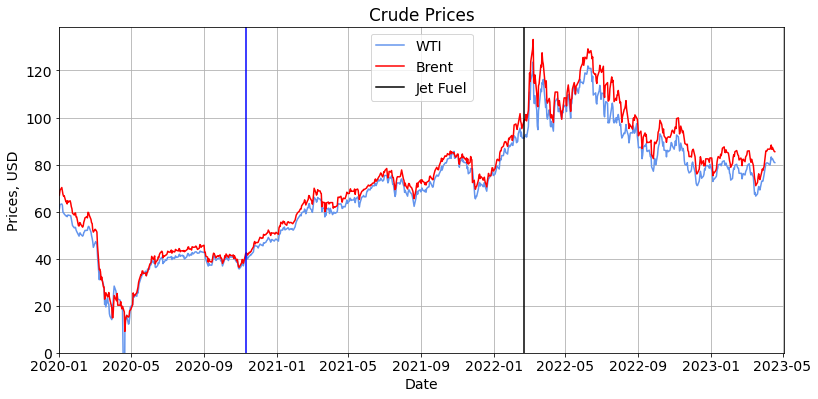

In [17]:
year=2020
start_date_crude = f"{year}-01-01"
end_date_crude =  datetime.datetime.now()+timedelta(1)
WTI_date_storage_df = general_df['WTI_df'].loc[(general_df['WTI_df']['Date']> start_date_crude) & (general_df['WTI_df']['Date']< end_date_crude)]
brent_date_df=general_df['brent_df'].loc[(general_df['brent_df']['Date']> start_date_crude) & (general_df['brent_df']['Date']< end_date_crude)]
fig, ax1=plt.subplots(frameon=False, figsize=(13,6))

ax1.set_xlabel('Date')
ax1.set_title("Crude Prices")
ax1.set_ylabel('Prices, USD')
ax1.plot(WTI_date_storage_df['Date'],WTI_date_storage_df['Value'], color='CornflowerBlue')
ax1.plot(brent_date_df['Date'],brent_date_df['Value'], color='red')
plt.axvline(pd.Timestamp('2022-02-21'),color='black')
plt.axvline(pd.Timestamp('2020-11-10'),color='blue')
# _=plt.xticks(rotation=45)
ax1.tick_params(axis='y') 
ax1.margins(x=.00) 
# plt.axvline(pd.Timestamp('2022-02-21'),color='r')

ax1.yaxis.set_major_formatter(mpl.ticker.StrMethodFormatter('{x:,.0f}'))
ax1.set_xlim([datetime.date(year, 1, 1), datetime.datetime.now()+timedelta(10)])
ax1.grid()
ax1.set_ylim(max(WTI_date_storage_df['Value'].min()-10,0),WTI_date_storage_df['Value'].max()+15)

# ax2=ax1.twinx()
# ax2.set_ylabel('Kerosene Prices, USD')
# ax2.plot(general_df['kerosene_df']['Date'],general_df['kerosene_df']['Value'], color='black')
# ax2.tick_params(axis='y')
# ax2.yaxis.set_major_formatter(mpl.ticker.StrMethodFormatter('{x:,.0f}'))
# ax2.margins(x=.00) 
# ax2.yaxis.set_major_formatter(mpl.ticker.StrMethodFormatter('{x:,.0f}'))
# ax2.set_ylim(0,general_df['jet_fuel_df']['Value'].max()+2)
ax1.xaxis.set_major_formatter(mdates.DateFormatter("%Y-%m"))


print('###################### Brent ########################')
prints(brent_date_df,'Value')
print('###################### WTI ########################')
prints(WTI_date_storage_df,'Value')
# print('###################### kerosene_df Fuel ########################')
# prints(general_df['kerosene_df'],'Value')


blue_line = mlines.Line2D([], [], color='CornflowerBlue', label='WTI')
red = mlines.Line2D([], [], color='red', label='Brent')
black = mlines.Line2D([], [], color='black', label='Jet Fuel')
plt.legend(handles=[blue_line, red,black],loc='upper center')
plt.savefig("Data/Images/zoom_wti_brent.png", bbox_inches='tight')

In [18]:
year=2020
start_date_crude = f"{year}-01-01"
end_date_crude =  datetime.datetime.now()+timedelta(1)
WTI_date_storage_df = general_df['WTI_df'].loc[(general_df['WTI_df']['Date']> start_date_crude) & (general_df['WTI_df']['Date']< end_date_crude)]
brent_date_df=general_df['brent_df'].loc[(general_df['brent_df']['Date']> start_date_crude) & (general_df['brent_df']['Date']< end_date_crude)]

new_price=pd.merge(WTI_date_storage_df, brent_date_df, on = "Date", how = "left")
new_price['diff']=new_price['Value_y']-new_price['Value_x']


fig, ax1=plt.subplots(frameon=False, figsize=(13,6))
ax1.set_xlabel('Date')
ax1.set_title("Price Differential Between Brent and WTI")
ax1.set_ylabel('Price Differential')
ax1.plot(new_price['Date'],new_price['diff'], color='purple')
ax1.xaxis.set_major_formatter(mdates.DateFormatter("%Y-%m"))
# _=plt.xticks(rotation=45)
ax1.tick_params(axis='y') 
ax1.margins(x=.00) 

ax1.yaxis.set_major_formatter(mpl.ticker.StrMethodFormatter('{x:,.0f}'))
ax1.set_xlim([datetime.date(year, 1, 1), datetime.datetime.now()+timedelta(10)])
ax1.grid()

ax1.set_ylim(min(int(new_price['diff'].min()-1),0),15)


blue_line = mlines.Line2D([], [], color='purple', label='Price Differntial')
plt.legend(handles=[blue_line],loc='upper center')
# plt.savefig("Data/Images/wti_brent_differential.png", bbox_inches='tight')

In [19]:
year=2010
start_date = f"{year}-01-01"
end_date =  datetime.datetime.now() 

diesel_date=general_df['diesel_prices_df'].loc[(general_df['diesel_prices_df']['Date']>start_date) & (general_df['diesel_prices_df']['Date']< end_date)]
gasoline_prices_date_df=general_df['gasoline_prices_df'].loc[(general_df['gasoline_prices_df']['Date']>start_date) & (general_df['gasoline_prices_df']['Date']< end_date)]

fig, ax1=plt.subplots(frameon=False, figsize=(13,6))
ax1.set_xlabel('Date')
ax1.set_title("Gasoline and Diesel Prices")
ax1.set_ylabel('Prices Per Gallon')
ax1.plot(gasoline_prices_date_df['Date'],gasoline_prices_date_df['Value'], color='g')
ax1.plot(diesel_date['Date'],diesel_date['Value'], color='blue')
ax1.xaxis.set_major_formatter(mdates.DateFormatter("%Y"))
ax1.tick_params(axis='y')

ax1.grid()
ax1.margins(x=.0) 
ax1.yaxis.set_major_formatter(mpl.ticker.StrMethodFormatter('{x:,.0f}'))
ax1.set_xlim([datetime.date(year, 1, 1), datetime.datetime.now()+timedelta(20)])
ax1.set_ylim(max(general_df['kerosene_df']['Value'].min()-0.5,0),general_df['kerosene_df']['Value'].max()+1)
ax1.plot(general_df['kerosene_df']['Date'],general_df['kerosene_df']['Value'], color='black')


green_line = mlines.Line2D([], [], color='g', label='Gasoline Prices')
orange_line = mlines.Line2D([], [], color='blue', label='Diesel Prices')
black_line = mlines.Line2D([], [], color='black', label='Kerosene Prices')
plt.legend(handles=[green_line, orange_line,black_line], loc='upper center')
plt.savefig("Data/Images/Gasoline_Diesel_Prices.png", bbox_inches='tight')

print('########################## Gasoline #########################')
prints(gasoline_prices_date_df,'Value')
print('########################## Kerosene #########################')
prints(diesel_date,'Value')

########################## Gasoline #########################
First: 2.72                    First Date: [Timestamp('2010-01-04 00:00:00')]
Maximum: 5.11                Max Date: [Timestamp('2022-06-13 00:00:00')]
Minimum: 1.83                Min Date: [Timestamp('2016-02-15 00:00:00')]
Previous: 3.7               Previous Date: [Timestamp('2023-04-10 00:00:00')]
Last: 3.77                     Last Date: [Timestamp('2023-04-17 00:00:00')]
########################## Kerosene #########################
First: 2.8                    First Date: [Timestamp('2010-01-04 00:00:00')]
Maximum: 5.81                Max Date: [Timestamp('2022-06-20 00:00:00')]
Minimum: 1.98                Min Date: [Timestamp('2016-02-15 00:00:00')]
Previous: 4.1               Previous Date: [Timestamp('2023-04-10 00:00:00')]
Last: 4.12                     Last Date: [Timestamp('2023-04-17 00:00:00')]


In [20]:
year=2020
start_date = f"{year}-01-01"
end_date =  datetime.datetime.now() 

diesel_date=general_df['diesel_prices_df'].loc[(general_df['diesel_prices_df']['Date']>start_date) & (general_df['diesel_prices_df']['Date']< end_date)]
gasoline_prices_date_df=general_df['gasoline_prices_df'].loc[(general_df['gasoline_prices_df']['Date']>start_date) & (general_df['gasoline_prices_df']['Date']< end_date)]

fig, ax1=plt.subplots(frameon=False, figsize=(13,6))
ax1.set_xlabel('Date')
ax1.set_title("Gasoline and Diesel Prices")
ax1.set_ylabel('Prices Per Gallon')
ax1.plot(gasoline_prices_date_df['Date'],gasoline_prices_date_df['Value'], color='g')
ax1.plot(diesel_date['Date'],diesel_date['Value'], color='blue')
ax1.xaxis.set_major_formatter(mdates.DateFormatter("%Y-%m"))
ax1.tick_params(axis='y')

ax1.grid()
ax1.margins(x=.0) 
ax1.yaxis.set_major_formatter(mpl.ticker.StrMethodFormatter('{x:,.0f}'))
ax1.set_xlim([datetime.date(year, 1, 1), datetime.datetime.now()+timedelta(20)])
ax1.set_ylim(max(gasoline_prices_date_df['Value'].min()-0.5,0),gasoline_prices_date_df['Value'].max()+1)
plt.axvline(pd.Timestamp('2022-02-21'),color='black')
plt.axvline(pd.Timestamp('2020-11-10'),color='blue')

green_line = mlines.Line2D([], [], color='g', label='Gasoline Prices')
orange_line = mlines.Line2D([], [], color='blue', label='Diesel Prices')
plt.legend(handles=[orange_line,green_line], loc='upper left')
plt.savefig("Data/Images/Gasoline_Diesel_Prices_zoom.png", bbox_inches='tight')

print('########################## Gasoline #########################')
prints(gasoline_prices_date_df,'Value')
print('########################## Diesel #########################')
prints(diesel_date,'Value')

########################## Gasoline #########################
First: 2.67                    First Date: [Timestamp('2020-01-06 00:00:00')]
Maximum: 5.11                Max Date: [Timestamp('2022-06-13 00:00:00')]
Minimum: 1.87                Min Date: [Timestamp('2020-04-27 00:00:00')]
Previous: 3.7               Previous Date: [Timestamp('2023-04-10 00:00:00')]
Last: 3.77                     Last Date: [Timestamp('2023-04-17 00:00:00')]
########################## Diesel #########################
First: 3.08                    First Date: [Timestamp('2020-01-06 00:00:00')]
Maximum: 5.81                Max Date: [Timestamp('2022-06-20 00:00:00')]
Minimum: 2.37                Min Date: [Timestamp('2020-11-02 00:00:00')]
Previous: 4.1               Previous Date: [Timestamp('2023-04-10 00:00:00')]
Last: 4.12                     Last Date: [Timestamp('2023-04-17 00:00:00')]


# Crude Prices and Storage Visualizations

First: 431060                    First Date: [Timestamp('2020-01-03 00:00:00')]
Maximum: 540722.0                Max Date: [Timestamp('2020-06-19 00:00:00')]
Minimum: 409950.0                Min Date: [Timestamp('2022-03-25 00:00:00')]
Previous: 470549               Previous Date: [Timestamp('2023-04-07 00:00:00')]
Last: 465968                     Last Date: [Timestamp('2023-04-14 00:00:00')]


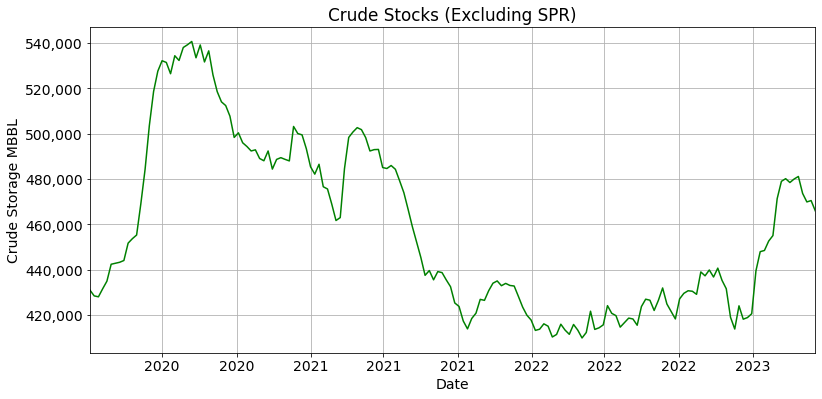

In [21]:
start_date = "2020-01-01"
end_date =datetime.datetime.now() 
crude_date_df=general_df['crude_df'].loc[(general_df['crude_df']['Date']>start_date) & (general_df['crude_df']['Date']< end_date)]
fig, ax1=plt.subplots(frameon=False, figsize=(13,6))

ax1.set_xlabel('Date')
ax1.set_ylabel('Crude Storage MBBL')
ax1.plot(crude_date_df['Date'],crude_date_df['Value'], color='g')
ax1.xaxis.set_major_formatter(mdates.DateFormatter("%Y"))

ax1.tick_params(axis='y')
ax1.set_title("Crude Stocks (Excluding SPR)")
plt.margins(x=.00)
ax1.yaxis.set_major_formatter(mpl.ticker.StrMethodFormatter('{x:,.0f}'))
ax1.grid()

prints(crude_date_df,'Value')

# blue_line = mlines.Line2D([], [], color='g', label='Crude Stocks')
# plt.legend(handles=[blue_line], loc='upper left')
plt.savefig("Data/Images/CrudeAPI.png", bbox_inches='tight')

#### Crude Stocks

In [ ]:
year=2014
start_date = f"{year}-01-01"
end_date =datetime.datetime.now() 
crude_date_df=general_df['crude_df'].loc[(general_df['crude_df']['Date']>start_date) & (general_df['crude_df']['Date']< end_date)]
fig, ax1=plt.subplots(frameon=False, figsize=(13,6))

ax1.set_xlabel('Date')
ax1.set_ylabel('Crude Storage MBBL')
ax1.plot(crude_date_df['Date'],crude_date_df['Value'], color='g')
ax1.xaxis.set_major_formatter(mdates.DateFormatter("%Y"))

ax1.tick_params(axis='y')
ax1.set_title("Crude Stocks (Excluding SPR)")
plt.margins(x=.00)
ax1.yaxis.set_major_formatter(mpl.ticker.StrMethodFormatter('{x:,.0f}'))
ax1.grid()
ax1.set_xlim([datetime.date(year, 1, 1), datetime.datetime.now()+timedelta(50)])


prints(crude_date_df,'Value')

# blue_line = mlines.Line2D([], [], color='g', label='Crude Stocks')
# plt.legend(handles=[blue_line], loc='upper left')
plt.savefig("Data/Images/Zoom_CrudeAPI.png", bbox_inches='tight')

In [ ]:
year=2016
start_date = f"{year}-01-01"
end_date =  datetime.datetime.now() 
spr_date_df=general_df['spr_df'].loc[(general_df['spr_df']['Date']>start_date) & (general_df['spr_df']['Date']< end_date)]
crude_date_df=general_df['crude_df'].loc[(general_df['crude_df']['Date']>start_date) & (general_df['crude_df']['Date']< end_date)]


fig, ax1=plt.subplots(frameon=False, figsize=(13,6))
plt.axvline(pd.Timestamp('2021-01-20'),color='b')
plt.axvline(pd.Timestamp('2017-01-20'),color='r')

ax1.set_xlabel('Date')
ax1.set_ylabel('Crude Storage MBBL')
ax1.plot(crude_date_df['Date'],crude_date_df['Value'], color='g')
ax1.xaxis.set_major_formatter(mdates.DateFormatter("%Y-%m"))

ax1.tick_params(axis='y')
ax1.set_title("Crude Storage Versus SPR")
plt.margins(x=.02)
ax1.yaxis.set_major_formatter(mpl.ticker.StrMethodFormatter('{x:,.0f}'))

ax2=ax1.twinx()
ax2.set_ylabel('SPR MBBL')
ax2.plot(spr_date_df['Date'], spr_date_df['Value'], color='black')
ax2.tick_params(axis='y')
ax2.yaxis.set_major_formatter(mpl.ticker.StrMethodFormatter('{x:,.0f}'))
ax2.margins(x=.00) 
ax2.yaxis.set_major_formatter(mpl.ticker.StrMethodFormatter('{x:,.0f}'))
ax2.set_yticks(np.linspace(ax2.get_yticks()[0], ax2.get_yticks()[-1], len(ax1.get_yticks())))

ax1.grid()
ax1.margins(x=.00) 
ax1.yaxis.set_major_formatter(mpl.ticker.StrMethodFormatter('{x:,.0f}'))
ax1.set_ylim(max(crude_date_df['Value'].min()-5000,0),crude_date_df['Value'].max()+5000)
ax2.set_ylim(max(spr_date_df['Value'].min()-5000,0),spr_date_df['Value'].max()+50000)

ax1.set_xlim([datetime.date(year, 1, 1), datetime.datetime.now()+timedelta(1)])

green_line = mlines.Line2D([], [], color='g', label='Crude Storage')
orange_line = mlines.Line2D([], [], color='black', label='SPR')
plt.legend(handles=[green_line, orange_line], loc='upper left')


print('################# Crude Storage ###############')
prints(crude_date_df,'Value')
print('################# SPR ###############')
prints(spr_date_df,'Value')
print('')
print('SPR:')
print(spr_date_df.tail(5))

plt.savefig("Data/Images/Crude_Versus_SPR.png", bbox_inches='tight')

# Gasoline and Distilate

In [ ]:
year=2013
start_date = f"{year}-01-01"
end_date =  datetime.datetime.now() 

diesel_df_date=general_df['diesel_df'].loc[(general_df['diesel_df']['Date']>start_date) & (general_df['diesel_df']['Date']< end_date)]
gasoline_date_df=general_df['gasoline_df'].loc[(general_df['gasoline_df']['Date']>start_date) & (general_df['gasoline_df']['Date']< end_date)]
crude_date_df=general_df['crude_df'][(general_df['crude_df']['Date']>start_date) & (general_df['crude_df']['Date']< end_date)]
fig, ax1=plt.subplots(frameon=False, figsize=(13,6))

ax1.set_xlabel('Date')
ax1.set_ylabel('Distillate MBBL')
ax1.plot(diesel_df_date['Date'],diesel_df_date['Value'], color='g')
ax1.xaxis.set_major_formatter(mdates.DateFormatter("%Y-%m"))

ax1.tick_params(axis='y')
ax1.set_title("Distillate And Gasoline Storage")
ax2=ax1.twinx()

ax2.set_ylabel('Gasoline Storage MBBL')
ax2.plot(gasoline_date_df['Date'], gasoline_date_df['Value'], color='orange')
ax2.tick_params(axis='y')
plt.margins(x=.02)
ax1.yaxis.set_major_formatter(mpl.ticker.StrMethodFormatter('{x:,.0f}'))
ax2.yaxis.set_major_formatter(mpl.ticker.StrMethodFormatter('{x:,.0f}'))

ax1.grid()
ax2.margins(x=.00) 
ax1.margins(x=.00) 
ax1.yaxis.set_major_formatter(mpl.ticker.StrMethodFormatter('{x:,.0f}'))
ax2.yaxis.set_major_formatter(mpl.ticker.StrMethodFormatter('{x:,.0f}'))

ax2.set_ylim(int(gasoline_date_df['Value'].min())-1000,int(gasoline_date_df['Value'].max())+1000)
ax2.set_ylim(int(gasoline_date_df['Value'].min())-1000,int(gasoline_date_df['Value'].max())+1000)
ax2.set_yticks(np.linspace(ax2.get_yticks()[0], ax2.get_yticks()[-1], len(ax1.get_yticks())))
ax1.set_xlim([datetime.date(year, 1, 1), datetime.datetime.now()+timedelta(1)])

green_line = mlines.Line2D([], [], color='g', label='Distillate Storage')
orange_line = mlines.Line2D([], [], color='orange', label='Gasoline Storage')
plt.legend(handles=[green_line, orange_line], loc='upper left')

plt.savefig("Data/Images/Crude_vs_Gasoline_Storage_API.png", bbox_inches='tight')
print('############### Distillate #####################')
prints(diesel_df_date,'Value')
print('############### Gasoline #####################')
prints(gasoline_date_df,'Value')

#### Crude and Gasoline Storage

In [ ]:
year=2014
start_date = f"{year}-01-01"
end_date =  datetime.datetime.now() 

gasoline_date_df=general_df['gasoline_df'].loc[(general_df['gasoline_df']['Date']>start_date) & (general_df['gasoline_df']['Date']< end_date)]
crude_date_df=general_df['crude_df'].loc[(general_df['crude_df']['Date']>start_date) & (general_df['crude_df']['Date']< end_date)]
fig, ax1=plt.subplots(frameon=False, figsize=(13,6))

ax1.set_xlabel('Date')
ax1.set_ylabel('Crude Storage MBBL')
ax1.plot(crude_date_df['Date'],crude_date_df['Value'], color='g')
ax1.xaxis.set_major_formatter(mdates.DateFormatter("%Y-%m"))

ax1.tick_params(axis='y')
ax1.set_title("Crude And Gasoline Storage (Excluding SPR)")
ax2=ax1.twinx()
ax2.set_ylabel('Gasoline Storage MBBL')
ax2.plot(gasoline_date_df['Date'], gasoline_date_df['Value'], color='orange')
ax2.tick_params(axis='y')
plt.margins(x=.02)
ax1.yaxis.set_major_formatter(mpl.ticker.StrMethodFormatter('{x:,.0f}'))
ax2.yaxis.set_major_formatter(mpl.ticker.StrMethodFormatter('{x:,.0f}'))

ax1.grid()
ax2.margins(x=.00) 
ax1.margins(x=.00) 
ax1.yaxis.set_major_formatter(mpl.ticker.StrMethodFormatter('{x:,.0f}'))
ax2.yaxis.set_major_formatter(mpl.ticker.StrMethodFormatter('{x:,.0f}'))

ax1.set_ylim(max(crude_date_df['Value'].min()-5000,0),crude_date_df['Value'].max()+5000)
ax2.set_ylim(max(gasoline_date_df['Value'].min()-5000,0),gasoline_date_df['Value'].max()+5000)

ax2.set_yticks(np.linspace(ax2.get_yticks()[0], ax2.get_yticks()[-1], len(ax1.get_yticks())))
ax1.set_xlim([datetime.date(year, 1, 1), datetime.datetime.now()+timedelta(1)])

green_line = mlines.Line2D([], [], color='g', label='Crude Storage')
orange_line = mlines.Line2D([], [], color='orange', label='Gasoline Storage')
plt.legend(handles=[green_line, orange_line], loc='upper left')

plt.savefig("Data/Images/Crude_vs_Gasoline_Storage_API.png", bbox_inches='tight')
print('############### Crude #####################')
prints(crude_date_df,'Value')
print('############### Gasoline #####################')
prints(gasoline_date_df,'Value')

#### Crude Storage Vs. Crude Prices for 2020

In [ ]:
year=2014
day=1
month=1

start_date_crude = f"{year}-0{month}-0{day}"
end_date_crude =  datetime.datetime.now()

# crude_date_storage_df = crude_df[(crude_df['Date']> start_date_crude) & (crude_df['Date']< end_date_crude)]


crude_date_df=general_df['crude_df'].loc[(general_df['crude_df']['Date']>start_date) & (general_df['crude_df']['Date']< end_date)]
WTI_date_storage_df = general_df['WTI_df'].loc[(general_df['WTI_df']['Date']> start_date_crude) & (general_df['WTI_df']['Date']< end_date_crude)]
gasoline_date_df=general_df['gasoline_df'].loc[(general_df['gasoline_df']['Date']>start_date) & (general_df['gasoline_df']['Date']< end_date)]
fig, ax1=plt.subplots(frameon=False, figsize=(13,6))

ax1.set_xlabel('Date')
ax1.set_ylabel('Crude And Gasoline Storage MBBL')
ax1.plot(crude_date_df['Date'],crude_date_df['Value'], color='g')
ax1.plot(gasoline_date_df['Date'],gasoline_date_df['Value'], color='orange')
ax1.xaxis.set_major_formatter(mdates.DateFormatter("%Y-%m"))
ax1.tick_params(axis='y')
ax1.set_title("Crude Storage Vs. Crude Prices For 2020 (Excluding SPR)")

ax2=ax1.twinx()
ax2.set_ylabel('Crude Prices (WTI)')
ax2.plot(WTI_date_storage_df['Date'], WTI_date_storage_df['Value'], color='CornflowerBlue') 
ax2.tick_params(axis='y') 

ax1.yaxis.set_major_formatter(mpl.ticker.StrMethodFormatter('{x:,.0f}'))
ax2.yaxis.set_major_formatter(mpl.ticker.StrMethodFormatter('{x:,.0f}'))
ax1.grid()
ax1.set_xlim([datetime.date(year, 1, 1), datetime.datetime.now()+timedelta(50)])

ax2.margins(x=.00) 
ax1.margins(x=.00) 

ax1.set_ylim(max(crude_date_df['Value'].min()-5000,0),crude_date_df['Value'].max()+5000)
ax2.set_ylim(max(WTI_date_storage_df['Value'].min()-5,0),WTI_date_storage_df['Value'].max()+2)

ax2.set_yticks(np.linspace(ax2.get_yticks()[0], ax2.get_yticks()[-1], len(ax1.get_yticks())))

green_line = mlines.Line2D([], [], color='g', label='Crude Storage')
blue_line = mlines.Line2D([], [], color='CornflowerBlue', label='Crude Price (WTI)')
orange_line = mlines.Line2D([], [], color='orange', label='Gasoline Price')
plt.legend(handles=[green_line,blue_line,orange_line],loc='upper left')
# plt.savefig("Data/Images/Crude_Storage_Vs_Crude_Prices_For_2020.png", bbox_inches='tight')

print('############### Crude #####################')
prints(crude_date_df,'Value')
print('############### Gasoline #####################')
prints(gasoline_date_df,'Value')
print('############### WTI #####################')
prints(WTI_date_storage_df,'Value')

#### Crude Storage

In [ ]:
year=2014
start_date = f"{year}-01-01"
end_date =datetime.datetime.now() 
crude_date_df=general_df['crude_df'].loc[(general_df['crude_df']['Date']>start_date) & (general_df['crude_df']['Date']< end_date)]
fig, ax1=plt.subplots(frameon=False, figsize=(13,6))

ax1.set_xlabel('Date')
ax1.set_ylabel('Crude Storage MBBL')
ax1.plot(crude_date_df['Date'],crude_date_df['Value'], color='g',alpha=0.6)
ax1.xaxis.set_major_formatter(mdates.DateFormatter("%Y"))

y=str(crude_date_df['Date'].max())[5:10]
plt.axvline(pd.Timestamp(f'2014-{y}'),color='b',alpha=0.8)
plt.axvline(pd.Timestamp(f'2015-{y}'),color='b',alpha=0.8)
plt.axvline(pd.Timestamp(f'2016-{y}'),color='b',alpha=0.8)
plt.axvline(pd.Timestamp(f'2017-{y}'),color='b',alpha=0.8)
plt.axvline(pd.Timestamp(f'2018-{y}'),color='b',alpha=0.8)
plt.axvline(pd.Timestamp(f'2019-{y}'),color='b',alpha=0.8)
plt.axvline(pd.Timestamp(f'2020-{y}'),color='b',alpha=0.8)
plt.axvline(pd.Timestamp(f'2021-{y}'),color='b',alpha=0.8)
plt.axvline(pd.Timestamp(f'2022-{y}'),color='b',alpha=0.8)
plt.axvline(pd.Timestamp(f'2023-{y}'),color='b',alpha=0.8)
plt.axhline(y=crude_date_df['Value'].iloc[-1],color='r',alpha=0.8)
ax1.set_xlim([datetime.date(year, 1, 1), datetime.datetime.now()+timedelta(50)])
ax1.set_ylim(int(crude_date_df['Value'].min())-1,int(crude_date_df['Value'].max())+1)

ax1.tick_params(axis='y')
ax1.set_title("Crude Stocks (Excluding SPR)")
plt.margins(x=.00)
ax1.yaxis.set_major_formatter(mpl.ticker.StrMethodFormatter('{x:,.0f}'))
ax1.grid()
prints(crude_date_df,'Value')

# blue_line = mlines.Line2D([], [], color='g', label='Crude Stocks')
# plt.legend(handles=[blue_line], loc='upper left')
plt.savefig("Data/Images/CrudeAPI_yearly_comparison.png", bbox_inches='tight')

### Distillate Storage

In [ ]:
year=2014
start_date_crude = f"{year}-01-01"
end_date_crude =  datetime.datetime.now()
diesel_df_date=general_df['diesel_df'].loc[(general_df['diesel_df']['Date']>start_date) & (general_df['diesel_df']['Date']< end_date)]

common_vals = {
    'color': 'b',
    'alpha': 0.8,
    'y': str(diesel_df_date['Date'].max())[5:10],
    'ymin': diesel_df_date['Value'].min() - 5000,
    'ymax': diesel_df_date['Value'].max() + 5000,
    'label': 'Distillate Storage',
}

# Create the plot
fig, ax1 = plt.subplots(frameon=False, figsize=(13, 6))
ax1.set_xlabel('Date')
ax1.set_ylabel('Distillate Storage')
ax1.plot(diesel_df_date['Date'], diesel_df_date['Value'], color='g', alpha=0.8)
ax1.xaxis.set_major_formatter(mdates.DateFormatter("%Y"))
ax1.tick_params(axis='y')
ax1.set_title("Distillate Storage")
ax1.grid()
ax1.margins(x=.02)
ax1.margins(x=.00) 
ax1.yaxis.set_major_formatter(mpl.ticker.StrMethodFormatter('{x:,.0f}'))
ax1.set_xlim([datetime.date(year, 1, 1), datetime.datetime.now() + timedelta(50)])
ax1.set_ylim(common_vals['ymin'], common_vals['ymax'])

# Add vertical lines
for i in range(2014, 2024):
    plt.axvline(pd.Timestamp(f'{i}-{common_vals["y"]}'), color=common_vals['color'], alpha=common_vals['alpha'])

# Add horizontal line
plt.axhline(y=diesel_df_date['Value'].iloc[-1], color='r')

# Add legend
green_line = mlines.Line2D([], [], color='g', label=common_vals['label'])
plt.legend(handles=[green_line], loc='upper center')

### Crude Prices

In [ ]:
year=2014
start_date_crude = f"{year}-01-01"
end_date_crude =  datetime.datetime.now()
WTI_date_storage_df = general_df['WTI_df'].loc[(general_df['WTI_df']['Date']> start_date_crude) & (general_df['WTI_df']['Date']< end_date_crude)]

fig, ax1=plt.subplots(frameon=False, figsize=(13,6))
ax1.set_xlabel('Date')
ax1.set_ylabel('Crude Prices')
ax1.plot(WTI_date_storage_df['Date'], WTI_date_storage_df['Value'], color='CornflowerBlue',alpha=0.8)
ax1.xaxis.set_major_formatter(mdates.DateFormatter("%Y"))
# _=plt.xticks(rotation=45)
ax1.tick_params(axis='y')
ax1.set_title("Crude Prices")
plt.margins(x=.02)
ax1.grid()

ax1.margins(x=.00) 
ax1.yaxis.set_major_formatter(mpl.ticker.StrMethodFormatter('{x:,.0f}'))
ax1.set_xlim([datetime.date(year, 1, 1), datetime.datetime.now()+timedelta(50)])
ax1.set_ylim(int(WTI_date_storage_df['Value'].min())-1,int(WTI_date_storage_df['Value'].max())+1)

# # y=str(WTI_date_storage_df['Date'].max())[5:10]
# start = date(year, 1, 1) 
# end = date(year_now, 1, 1)
# lst=[year for year in range(start.year, end.year +1)]
# lst=[year for year in range(start.year, end.year +1)]
# for i in range(len(lst)):
#     plt.axvline(pd.Timestamp(f'{lst[i]}-{month_now}-{day_now}'),color='black',alpha=0.8)

y=str(WTI_date_storage_df['Date'].max())[5:10]
plt.axvline(pd.Timestamp(f'2014-{y}'),color='b',alpha=0.8)
plt.axvline(pd.Timestamp(f'2015-{y}'),color='b',alpha=0.8)
plt.axvline(pd.Timestamp(f'2016-{y}'),color='b',alpha=0.8)
plt.axvline(pd.Timestamp(f'2017-{y}'),color='b',alpha=0.8)
plt.axvline(pd.Timestamp(f'2018-{y}'),color='b',alpha=0.8)
plt.axvline(pd.Timestamp(f'2019-{y}'),color='b',alpha=0.8)
plt.axvline(pd.Timestamp(f'2020-{y}'),color='b',alpha=0.8)
plt.axvline(pd.Timestamp(f'2021-{y}'),color='b',alpha=0.8)
plt.axvline(pd.Timestamp(f'2022-{y}'),color='b',alpha=0.8)
plt.axvline(pd.Timestamp(f'2023-{y}'),color='b',alpha=0.8)
plt.axhline(y=WTI_date_storage_df['Value'].iloc[-1],color='r')
    
    
    
plt.axhline(y=WTI_date_storage_df['Value'].iloc[-1],color='r')

# green_line = mlines.Line2D([], [], color='CornflowerBlue', label='Crude Prices')
# plt.legend(handles=[green_line],loc='upper center')
# plt.savefig("Data/Images/Gasoline_Storage_Vs_Crude_Prices.png", bbox_inches='tight')

print('############### Crude Prices #####################')
prints(WTI_date_storage_df,'Value')

#### Gasoline Storage

In [ ]:
year=2014
start_date_crude = f"{year}-01-01"
end_date_crude =  datetime.datetime.now()
gasoline_date_df=general_df['gasoline_df'].loc[(general_df['gasoline_df']['Date']>start_date) & (general_df['gasoline_df']['Date']< end_date)]

fig, ax1=plt.subplots(frameon=False, figsize=(13,6))
ax1.set_xlabel('Date')
ax1.set_ylabel('Gasoline Storage')
ax1.plot(gasoline_date_df['Date'], gasoline_date_df['Value'], color='orange',alpha=0.8)
ax1.xaxis.set_major_formatter(mdates.DateFormatter("%Y"))
# _=plt.xticks(rotation=45)
ax1.tick_params(axis='y')
ax1.set_title("Gasoline Storage")
plt.margins(x=.02)
ax1.grid()

ax1.margins(x=.00) 

ax1.yaxis.set_major_formatter(mpl.ticker.StrMethodFormatter('{x:,.0f}'))
ax1.set_xlim([datetime.date(year, 1, 1), datetime.datetime.now()+timedelta(50)])
ax1.set_ylim(max(gasoline_date_df['Value'].min()-5000,0),gasoline_date_df['Value'].max()+5000)

y=str(gasoline_date_df['Date'].max())[5:10]
plt.axvline(pd.Timestamp(f'2014-{y}'),color='b',alpha=0.8)
plt.axvline(pd.Timestamp(f'2015-{y}'),color='b',alpha=0.8)
plt.axvline(pd.Timestamp(f'2016-{y}'),color='b',alpha=0.8)
plt.axvline(pd.Timestamp(f'2017-{y}'),color='b',alpha=0.8)
plt.axvline(pd.Timestamp(f'2018-{y}'),color='b',alpha=0.8)
plt.axvline(pd.Timestamp(f'2019-{y}'),color='b',alpha=0.8)
plt.axvline(pd.Timestamp(f'2020-{y}'),color='b',alpha=0.8)
plt.axvline(pd.Timestamp(f'2021-{y}'),color='b',alpha=0.8)
plt.axvline(pd.Timestamp(f'2022-{y}'),color='b',alpha=0.8)
plt.axvline(pd.Timestamp(f'2023-{y}'),color='b',alpha=0.8)
plt.axhline(y=gasoline_date_df['Value'].iloc[-1],color='r')

green_line = mlines.Line2D([], [], color='orange', label='Gasoline Storage')
plt.legend(handles=[green_line],loc='upper center')
# plt.savefig("Data/Images/Gasoline_Storage_Vs_Crude_Prices.png", bbox_inches='tight')

print('############### Gasoline #####################')
prints(gasoline_date_df,'Value')

In [ ]:
year=2014
start_date_crude = f"{year}-01-01"
end_date_crude =  datetime.datetime.now()
crude_date_df=general_df['crude_df'].loc[(general_df['crude_df']['Date']>start_date) & (general_df['crude_df']['Date']< end_date)]
WTI_date_storage_df = general_df['WTI_df'].loc[(general_df['WTI_df']['Date']> start_date_crude) & (general_df['WTI_df']['Date']< end_date_crude)]
gasoline_date_df=general_df['gasoline_df'].loc[(general_df['gasoline_df']['Date']>start_date) & (general_df['gasoline_df']['Date']< end_date)]
fig, ax1=plt.subplots(frameon=False, figsize=(13,6))

ax1.set_xlabel('Date')
ax1.set_ylabel('Gasoline Storage')
ax1.plot(gasoline_date_df['Date'], gasoline_date_df['Value'], color='orange')
ax1.xaxis.set_major_formatter(mdates.DateFormatter("%Y-%m"))
# _=plt.xticks(rotation=45)
ax1.tick_params(axis='y')
ax1.set_title("Gasoline Storage Vs. Crude Prices")
plt.margins(x=.02)
ax2=ax1.twinx()
ax2.set_ylabel('Crude Prices (WTI)')
ax2.plot(WTI_date_storage_df['Date'], WTI_date_storage_df['Value'], color='CornflowerBlue')
ax2.tick_params(axis='y')
ax1.grid()

ax2.margins(x=.00) 
ax1.margins(x=.00) 

ax1.yaxis.set_major_formatter(mpl.ticker.StrMethodFormatter('{x:,.0f}'))
ax2.yaxis.set_major_formatter(mpl.ticker.StrMethodFormatter('{x:,.0f}'))

ax1.set_xlim([datetime.date(year, 1, 1), datetime.datetime.now()+timedelta(50)])
# ax2.set_xlim([datetime.date(2014, 1, 1), datetime.datetime.now()+timedelta(20)])

# ax2.set_yticks(np.linspace(ax2.get_yticks()[0], ax2.get_yticks()[-1], len(ax1.get_yticks())))
ax1.set_ylim(max(gasoline_date_df['Value'].min()-5000,0),gasoline_date_df['Value'].max()+5000)
ax2.set_ylim(max(WTI_date_storage_df['Value'].min()-2,0),WTI_date_storage_df['Value'].max()+2)

ax2.set_yticks(np.linspace(ax2.get_yticks()[0], ax2.get_yticks()[-1], len(ax1.get_yticks())))

green_line = mlines.Line2D([], [], color='orange', label='Gasoline Storage')
blue_line = mlines.Line2D([], [], color='CornflowerBlue', label='Crude Price (WTI)')
plt.legend(handles=[green_line,blue_line],loc='upper center')
# plt.savefig("Data/Images/Gasoline_Storage_Vs_Crude_Prices.png", bbox_inches='tight')

print('############### Gasoline #####################')
prints(gasoline_date_df,'Value')
print('############### WTI #####################')
prints(WTI_date_storage_df,'Value')

# Duc vs Prices

#### Total DUC Inventory Vs. Crude Prices

In [ ]:
year=2014
start_date_crude = f"{year}-01-01"
end_date_crude =  datetime.datetime.now()
crude_date_df=general_df['crude_df'].loc[(general_df['crude_df']['Date']>start_date) & (general_df['crude_df']['Date']< end_date)]
WTI_date_storage_df = general_df['WTI_df'].loc[(general_df['WTI_df']['Date']> start_date_crude) & (general_df['WTI_df']['Date']< end_date_crude)]
gasoline_date_df=general_df['gasoline_df'].loc[(general_df['gasoline_df']['Date']>start_date) & (general_df['gasoline_df']['Date']< end_date)]
fig, ax1=plt.subplots(frameon=False, figsize=(13,6))

ax1.set_xlabel('Date')
ax1.set_ylabel('DUC Inventory')
ax1.plot(DUCInventory_df['Date'],DUCInventory_df['Total_DUC'], color='grey')
ax1.xaxis.set_major_formatter(mdates.DateFormatter("%Y-%m"))
# _=plt.xticks(rotation=45)
ax1.tick_params(axis='y')
ax1.set_title("Total DUC Inventory Vs. Crude Prices")

ax2=ax1.twinx()
ax2.set_ylabel('Crude Prices (WTI)')
ax2.plot(WTI_date_storage_df['Date'], WTI_date_storage_df['Value'], color='CornflowerBlue')
ax2.tick_params(axis='y')

ax2.margins(x=.00) 
ax1.margins(x=.00) 

ax1.yaxis.set_major_formatter(mpl.ticker.StrMethodFormatter('{x:,.0f}'))
ax2.yaxis.set_major_formatter(mpl.ticker.StrMethodFormatter('{x:,.0f}'))
ax1.grid()

ax1.set_ylim(DUCInventory_df['Total_DUC'].min()-100,DUCInventory_df['Total_DUC'].max()+100)
ax2.set_ylim(WTI_date_storage_df['Value'].min()-1,WTI_date_storage_df['Value'].max()+1)
ax2.set_yticks(np.linspace(ax2.get_yticks()[0], ax2.get_yticks()[-1], len(ax1.get_yticks())))
ax1.set_xlim([datetime.date(year, 1, 1), datetime.datetime.now()+timedelta(50)])


# defining legend style and data
grey = mlines.Line2D([], [], color='grey', label='Total DUC Inventory')
blue_line = mlines.Line2D([], [], color='CornflowerBlue', label='Crude Price (WTI)')
plt.legend(handles=[grey,blue_line],loc='upper center')
plt.savefig("Data/Images/Total_DUC_Inventory_vs_Prices.png", bbox_inches='tight')



print('############### Total DUC #####################')
prints(DUCInventory_df,'Total_DUC')
print('############### WTI #####################')
prints(WTI_date_storage_df,'Value')

In [ ]:
year=2014
start_date_crude = f"{year}-01-01"
end_date_crude =  datetime.datetime.now()
crude_date_df=general_df['crude_df'].loc[(general_df['crude_df']['Date']>start_date) & (general_df['crude_df']['Date']< end_date)]
WTI_date_storage_df = general_df['WTI_df'].loc[(general_df['WTI_df']['Date']> start_date_crude) & (general_df['WTI_df']['Date']< end_date_crude)]
gasoline_date_df=general_df['gasoline_df'].loc[(general_df['gasoline_df']['Date']>start_date) & (general_df['gasoline_df']['Date']< end_date)]
fig, ax1=plt.subplots(frameon=False, figsize=(13,6))

ax1.set_xlabel('Date')
ax1.set_ylabel('DUC Inventory')
ax1.plot(DUCInventory_df['Date'],DUCInventory_df['Permian_DUC'], color='lime')
ax1.xaxis.set_major_formatter(mdates.DateFormatter("%Y-%m"))
# _=plt.xticks(rotation=45)
ax1.tick_params(axis='y')
ax1.set_title("Permian DUC Inventory Vs. Crude Prices")

ax2=ax1.twinx()
ax2.set_ylabel('Crude Prices (WTI)')
ax2.plot(WTI_date_storage_df['Date'], WTI_date_storage_df['Value'], color='CornflowerBlue')
ax2.tick_params(axis='y')

ax2.margins(x=.00) 
ax1.margins(x=.00) 

ax1.yaxis.set_major_formatter(mpl.ticker.StrMethodFormatter('{x:,.0f}'))
ax2.yaxis.set_major_formatter(mpl.ticker.StrMethodFormatter('{x:,.0f}'))
ax1.grid()

ax1.set_ylim(max(DUCInventory_df['Permian_DUC'].min()-100,0),DUCInventory_df['Permian_DUC'].max()+100)
ax2.set_ylim(max(WTI_date_storage_df['Value'].min()-2,0),WTI_date_storage_df['Value'].max()+2)

ax2.set_yticks(np.linspace(ax2.get_yticks()[0], ax2.get_yticks()[-1], len(ax1.get_yticks())))
ax1.set_xlim([datetime.date(year, 1, 1), datetime.datetime.now()+timedelta(50)])

grey = mlines.Line2D([], [], color='lime', label='Permian DUC Inventory')
blue_line = mlines.Line2D([], [], color='CornflowerBlue', label='Crude Price (WTI)')
plt.legend(handles=[grey,blue_line],loc='upper center')
# plt.savefig("Data/Images/Total_DUC_Inventory_vs_Prices.png", bbox_inches='tight')


print('############### Total DUC #####################')
prints(DUCInventory_df,'Permian_DUC')
print('############### Total DUC #####################')
prints(WTI_date_storage_df,'Value')

# Futures

In [ ]:
gas_futures_April_2023 = yf.Ticker('CL=F').history(period="max").reset_index()
gas_futures_April_2023

In [ ]:
import time
start_time = time.time()


import concurrent.futures

tickers = {
#     'feb_2023': 'NGG23.NYM',
#     'mar_2023': 'NGH23.NYM',
#     'apr_2023': 'NGJ23.NYM',
    'may_2023': 'NGK23.NYM',
    'jun_2023': 'NGM23.NYM',
    'jul_2023': 'NGN23.NYM',
    'aug_2023': 'NGQ23.NYM',
    'sep_2023': 'NGU23.NYM',
    'oct_2023': 'NGV23.NYM'
}

def download_history(ticker):
    return yf.Ticker(ticker).history(period="max").reset_index()

with concurrent.futures.ThreadPoolExecutor() as executor:
    futures = [executor.submit(download_history, ticker) for ticker in tickers.values()]

gas_futures = {}
for future, ticker in zip(concurrent.futures.as_completed(futures), tickers.keys()):
    gas_futures[ticker] = future.result()

    
end_time = time.time()
print(f"Time elapsed: {end_time - start_time:.2f} seconds")  


In [ ]:
# import time
# start_time = time.time()

# tickers = {
# #     'feb_2023': 'NGG23.NYM',
# #     'mar_2023': 'NGH23.NYM',
# #     'apr_2023': 'NGJ23.NYM',
#     'may_2023': 'NGK23.NYM',
#     'jun_2023': 'NGM23.NYM',
#     'jul_2023': 'NGN23.NYM',
#     'aug_2023': 'NGQ23.NYM',
#     'sep_2023': 'NGU23.NYM',
#     'oct_2023': 'NGV23.NYM'}

# gas_futures = {}
# for key, value in tickers.items():
#     gas_futures[key] = yf.Ticker(value).history(period="max").reset_index()
    
    
# end_time = time.time()
# print(f"Time elapsed: {end_time - start_time:.2f} seconds")  

In [ ]:
gas_futures['may_2023']

In [ ]:
year=2022
fig, ax1 = plt.subplots(frameon=False, figsize=(13, 6))
ax1.set_xlabel('Date')
ax1.set_title("Natural Gas Futures")
ax1.set_ylabel('Value of Futures')

colors = ['orangered', 'darkgreen', 'mediumblue', 'plum', 'blue', 'goldenrod']
for i, (key, value) in enumerate(gas_futures.items()):
    ax1.plot(value['Date'], value['Close'], color=colors[i])

ax1.xaxis.set_major_formatter(mdates.DateFormatter("%Y-%m"))
ax1.tick_params(axis='y') 
ax1.margins(x=.00) 
ax1.yaxis.set_major_formatter(mpl.ticker.StrMethodFormatter('{x:,.0f}'))
ax1.set_xlim([datetime.date(year, 1, 1), datetime.datetime.now()+timedelta(20)])
ax1.grid()
handles = [plt.Line2D([], [], color=color, label=key.capitalize()) for key, color in zip(tickers.keys(), colors)]
plt.legend(handles=handles, loc='upper left')

plt.savefig("Data/Images/gas_futures.png", bbox_inches='tight')

year=2001
start_date = f"{year}-01-01"
end_date =  datetime.datetime.now()

crude_prod_date_df=crude_prod_df[(crude_prod_df['Date']>start_date) & (crude_prod_df['Date']< end_date)] 
WTI_date_storage_df = general_df['WTI_df'].loc[(general_df['WTI_df']['Date']> start_date_crude) & (general_df['WTI_df']['Date']< end_date_crude)]
HH_date_df=Henr_Hub_NG_df[(Henr_Hub_NG_df['Date']>start_date) & (Henr_Hub_NG_df['Date']< end_date)] 
crude_prod_df_date=crude_prod_df[(crude_prod_df['Date']>start_date)& (crude_prod_df['Date']< end_date)]
natural_gas_rigs=general_df['natural_gas_df'].loc[(general_df['natural_gas_df']['Date']>start_date)& (general_df['natural_gas_df']['Date']< end_date)]

fig, ax1=plt.subplots(frameon=False, figsize=(13,6))
ax1.set_xlabel('Date')
ax1.set_ylabel('Crude Production (MMBPD)')

ax1.xaxis.set_major_formatter(mdates.DateFormatter("%Y-%m"))
# _=plt.xticks(rotation=45)
ax1.tick_params(axis='y')
ax1.set_title("US Crude Production vs Prices")
ax1.grid()

ax1.margins(x=.00) 
ax1.plot(crude_prod_df_date['Date'],crude_prod_df_date['Value'], color='black')  


ax2=ax1.twinx()
ax2.set_ylabel('Crude Prices (WTI)')
ax2.plot(WTI_date_df['Date'], WTI_date_df['Value'], color='CornflowerBlue')
ax2.tick_params(axis='y')
ax2.margins(x=.00)

ax1.set_ylim(max(crude_prod_df_date['Value'].min()-1,0),crude_prod_df_date['Value'].max()+1)
ax2.set_ylim(max(WTI_date_df['Value'].min()-2,0),WTI_date_df['Value'].max()+2)


ax1.yaxis.set_major_formatter(mpl.ticker.StrMethodFormatter('{x:,.0f}'))
ax2.yaxis.set_major_formatter(mpl.ticker.StrMethodFormatter('{x:,.0f}'))
ax2.set_yticks(np.linspace(ax2.get_yticks()[0], ax2.get_yticks()[-1], len(ax1.get_yticks())))
ax1.set_xlim([datetime.date(year, 1, 1), datetime.datetime.now()+timedelta(50)])


# defining legend style and data
green_line = mlines.Line2D([], [], color='black', label='Crude Production')
# red_line = mlines.Line2D([], [], color='red', label='Natural Gas Rigs')
blue_line = mlines.Line2D([], [], color='CornflowerBlue', label='Oil Prices')
plt.legend(handles=[green_line,blue_line],loc='upper left')

print('############### Production #####################')
prints(crude_prod_df_date,'Value')
print('############### WTI #####################')
prints(WTI_date_storage_df,'Value')



plt.savefig("Data/Images/Crude_vs_production.png", bbox_inches='tight')

year=2000
start_date = f"{year}-01-01"
end_date =  datetime.datetime.now()

onshore_rigs_df= general_df['onshore_df'].loc[(general_df['onshore_df']['Date']> start_date) & (general_df['onshore_df']['Date']< end_date)]
WTI_date_storage_df = general_df['WTI_df'].loc[(general_df['WTI_df']['Date']> start_date_crude) & (general_df['WTI_df']['Date']< end_date_crude)]
HH_date_df=Henr_Hub_NG_df[(Henr_Hub_NG_df['Date']>start_date) & (Henr_Hub_NG_df['Date']< end_date)] 
crude_prod_df_date=crude_prod_df[(crude_prod_df['Date']>start_date)& (crude_prod_df['Date']< end_date)]
natural_gas_rigs=general_df['natural_gas_df'].loc[(general_df['natural_gas_df']['Date']>start_date)& (general_df['natural_gas_df']['Date']< end_date)]
rigs=rig[(rig['Date']>start_date)& (rig['Date']< end_date)]

fig, ax1=plt.subplots(frameon=False, figsize=(13,6))
ax1.set_xlabel('Date')
ax1.set_ylabel('Oil Drilling Rigs')

ax1.xaxis.set_major_formatter(mdates.DateFormatter("%Y-%m"))
# _=plt.xticks(rotation=45)
ax1.tick_params(axis='y')
ax1.set_title("Rigs Vs Crude Prices")
ax1.grid()

ax1.margins(x=.00) 
ax1.plot(rigs['Date'],rigs['Oil'], color='black') 


ax2=ax1.twinx()
ax2.set_ylabel('Crude Prices (WTI)')
ax2.plot(WTI_date_df['Date'], WTI_date_df['Value'], color='CornflowerBlue')
ax2.tick_params(axis='y')
ax2.margins(x=.00)


ax1.set_ylim(max(rigs['Oil'].min()-1,0),rigs['Oil'].max()+1)
ax2.set_ylim(max(WTI_date_df['Value'].min()-2,0),WTI_date_df['Value'].max()+2)
ax1.set_xlim([datetime.date(year, 1, 1), datetime.datetime.now()+timedelta(50)])


ax1.yaxis.set_major_formatter(mpl.ticker.StrMethodFormatter('{x:,.0f}'))
ax2.yaxis.set_major_formatter(mpl.ticker.StrMethodFormatter('{x:,.0f}'))
ax2.set_yticks(np.linspace(ax2.get_yticks()[0], ax2.get_yticks()[-1], len(ax1.get_yticks())))
green_line = mlines.Line2D([], [], color='black', label='Oil Rigs')
blue_line = mlines.Line2D([], [], color='CornflowerBlue', label='Oil Prices')
plt.legend(handles=[green_line,blue_line],loc='upper left')

print('############### Oil Rigs #####################')
prints(rigs,'Oil')
print('############### WTI #####################')
prints(WTI_date_df,'Value')


ax1.set_ylim(bottom=0) 
plt.savefig("Data/Images/rigsvsprice.png", bbox_inches='tight')

year=2017
start_date = f"{year}-01-01"
end_date =  datetime.datetime.now()

onshore_rigs_df= general_df['onshore_df'].loc[(general_df['onshore_df']['Date']> start_date) & (general_df['onshore_df']['Date']< end_date)]
WTI_date_storage_df = general_df['WTI_df'].loc[(general_df['WTI_df']['Date']> start_date_crude) & (general_df['WTI_df']['Date']< end_date_crude)]
HH_date_df=Henr_Hub_NG_df[(Henr_Hub_NG_df['Date']>start_date) & (Henr_Hub_NG_df['Date']< end_date)] 
crude_prod_df_date=crude_prod_df[(crude_prod_df['Date']>start_date)& (crude_prod_df['Date']< end_date)]
natural_gas_rigs=general_df['natural_gas_df'].loc[(general_df['natural_gas_df']['Date']>start_date)& (general_df['natural_gas_df']['Date']< end_date)]
rigs=rig[(rig['Date']>start_date)& (rig['Date']< end_date)]

fig, ax1=plt.subplots(frameon=False, figsize=(13,6))
ax1.set_xlabel('Date')
ax1.set_ylabel('Oil Drilling Rigs')

ax1.xaxis.set_major_formatter(mdates.DateFormatter("%Y-%m"))
# _=plt.xticks(rotation=45)
ax1.tick_params(axis='y')
ax1.set_title("Rigs Vs Crude Prices")
ax1.grid()

ax1.margins(x=.00) 
ax1.plot(rigs['Date'],rigs['Oil'], color='black') 


ax2=ax1.twinx()
ax2.set_ylabel('Crude Prices (WTI)')
ax2.plot(WTI_date_df['Date'], WTI_date_df['Value'], color='CornflowerBlue')
ax2.tick_params(axis='y')
ax2.margins(x=.00)

ax1.set_ylim(max(rigs['Oil'].min()-2,0),rigs['Oil'].max()+2)
ax2.set_ylim(max(WTI_date_df['Value'].min()-2,0),WTI_date_df['Value'].max()+2)
ax1.set_xlim([datetime.date(year, 1, 1), datetime.datetime.now()+timedelta(50)])


ax1.yaxis.set_major_formatter(mpl.ticker.StrMethodFormatter('{x:,.0f}'))
ax2.yaxis.set_major_formatter(mpl.ticker.StrMethodFormatter('{x:,.0f}'))
ax2.set_yticks(np.linspace(ax2.get_yticks()[0], ax2.get_yticks()[-1], len(ax1.get_yticks())))
green_line = mlines.Line2D([], [], color='black', label='Oil Rigs')
blue_line = mlines.Line2D([], [], color='CornflowerBlue', label='Oil Prices')
plt.legend(handles=[green_line,blue_line],loc='upper left')

print('############### Oil Rigs #####################')
prints(rigs,'Oil')
print('############### WTI #####################')
prints(WTI_date_df,'Value')


ax1.set_ylim(bottom=0) 
plt.savefig("Data/Images/rigsvsprice_zoom.png", bbox_inches='tight')